### TransformerEncoder layers for transforming the ECG to the R-peaks encoding

In [1]:
import pickle
import numpy as np
import torch
from models.models import SimpleTransformerModel
from customLib.vis import plot_ecg
from customLib.dataset import read_dataset
from customLib.config import apnea_ecg_path, mitbih_path
from customLib.vis import plot_metrics
from customLib.print_model_parameters import print_model_parameters
from customLib.load_physionet_ecgs import load_physionet_ecgs

In [2]:
x_train, y_train, x_test, y_test, x_val, y_val = read_dataset(mitbih_path + "\\dataset\\raw", is_validation_set=True)

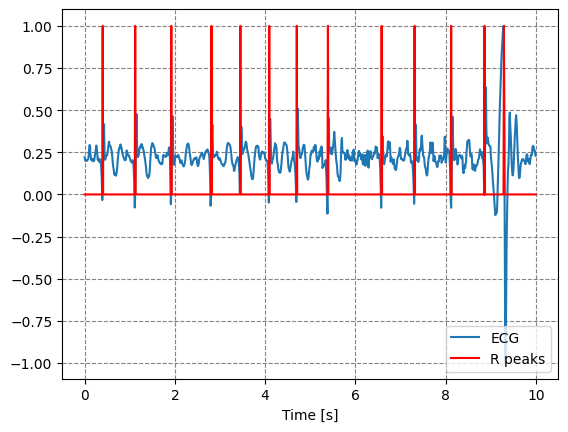

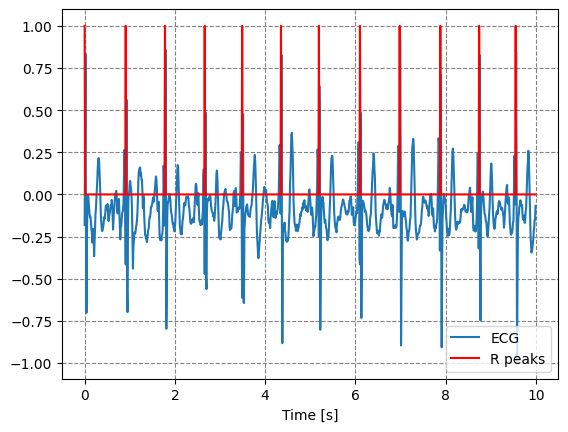

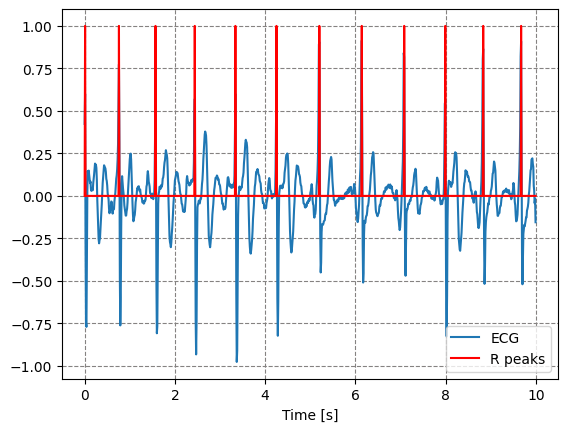

In [3]:
x_train = np.expand_dims(x_train, 2)
y_train = np.expand_dims(y_train, 2)

x_test = np.expand_dims(x_test, 2)
y_test = np.expand_dims(y_test, 2)

x_val = np.expand_dims(x_val, 2)
y_val = np.expand_dims(y_val, 2)

plot_ecg(x_train[100].flatten(), y_train[100].flatten(), 100)
plot_ecg(x_test[-1].flatten(), y_test[-1].flatten(), 100)
plot_ecg(x_val[-1].flatten(), y_val[-1].flatten(), 100)

In [2]:
epochs=50
batch_size = 100
input_dim = 32
seq_length = 1000
num_layers = 2
num_heads = 4
dim_feedforward = 32
dropout = 0.2

model = SimpleTransformerModel(input_dim, seq_length, num_layers, num_heads, dim_feedforward, dropout)
model.load_state_dict(torch.load(".\\checkpoints\TNET\\TNET_epoch_48_acc_99.15_f1_0.93.pt"))

<>:11: SyntaxWarning: invalid escape sequence '\T'
<>:11: SyntaxWarning: invalid escape sequence '\T'
C:\Users\patry\AppData\Local\Temp\ipykernel_1184\109119582.py:11: SyntaxWarning: invalid escape sequence '\T'
  model.load_state_dict(torch.load(".\\checkpoints\TNET\\TNET_epoch_48_acc_99.15_f1_0.93.pt"))
e:\anaconda3\envs\torch\Lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Training will be performed with: cuda:0


<All keys matched successfully>

In [5]:
print_model_parameters(model)

Layer embedding_layer: 4736 parameters
Layer embedding_layer.0: 64 parameters
Layer embedding_layer.2: 1568 parameters
Layer embedding_layer.4: 3104 parameters
Layer encoder_layer: 6464 parameters
Layer encoder_layer.self_attn: 4224 parameters
Layer encoder_layer.self_attn.out_proj: 1056 parameters
Layer encoder_layer.linear1: 1056 parameters
Layer encoder_layer.linear2: 1056 parameters
Layer encoder_layer.norm1: 64 parameters
Layer encoder_layer.norm2: 64 parameters
Layer transformer_encoder: 12928 parameters
Layer transformer_encoder.layers: 12928 parameters
Layer transformer_encoder.layers.0: 6464 parameters
Layer transformer_encoder.layers.0.self_attn: 4224 parameters
Layer transformer_encoder.layers.0.self_attn.out_proj: 1056 parameters
Layer transformer_encoder.layers.0.linear1: 1056 parameters
Layer transformer_encoder.layers.0.linear2: 1056 parameters
Layer transformer_encoder.layers.0.norm1: 64 parameters
Layer transformer_encoder.layers.0.norm2: 64 parameters
Layer transforme

====Epoch [1/50]====


  0%|          | 0/119 [00:00<?, ?it/s]e:\anaconda3\envs\torch\Lib\site-packages\torch\nn\functional.py:5504: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)
 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

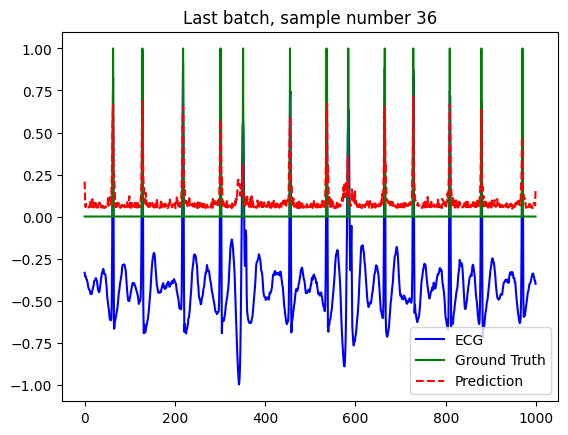

100%|██████████| 119/119 [02:10<00:00,  1.09s/it]



Train Loss: 0.3833
train Weighted Accuracy: 0.57436
train F1 Score: 0.20075
train TPR: 0.15355
train FPR: 0.00483
train TNR: 0.99517
train FNR: 0.84645



100%|██████████| 20/20 [00:03<00:00,  5.07it/s]



Validation Loss: 0.2379
validation Weighted Accuracy: 0.77149
validation F1 Score: 0.70226
validation TPR: 0.54302
validation FPR: 0.00004
validation TNR: 0.99996
validation FNR: 0.45698

====Epoch [2/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

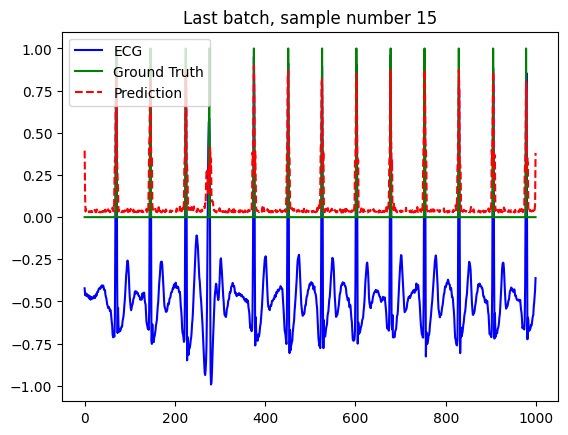

100%|██████████| 119/119 [02:11<00:00,  1.10s/it]



Train Loss: 0.1991
train Weighted Accuracy: 0.87727
train F1 Score: 0.81571
train TPR: 0.75578
train FPR: 0.00125
train TNR: 0.99875
train FNR: 0.24422



100%|██████████| 20/20 [00:03<00:00,  5.16it/s]



Validation Loss: 0.1619
validation Weighted Accuracy: 0.92128
validation F1 Score: 0.84446
validation TPR: 0.84456
validation FPR: 0.00200
validation TNR: 0.99800
validation FNR: 0.15544

====Epoch [3/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

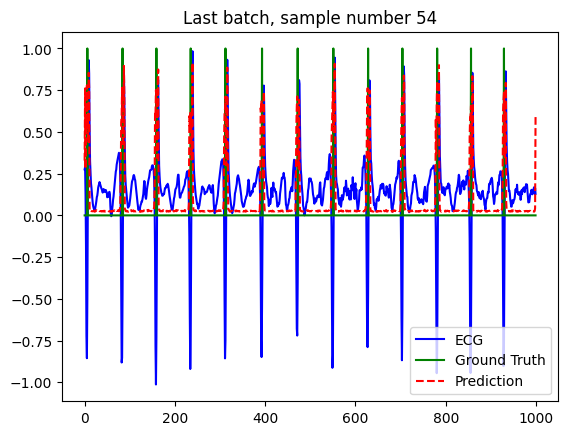

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.1572
train Weighted Accuracy: 0.94306
train F1 Score: 0.85154
train TPR: 0.88867
train FPR: 0.00255
train TNR: 0.99745
train FNR: 0.11133



100%|██████████| 20/20 [00:03<00:00,  5.07it/s]



Validation Loss: 0.1402
validation Weighted Accuracy: 0.95229
validation F1 Score: 0.87733
validation TPR: 0.90665
validation FPR: 0.00206
validation TNR: 0.99794
validation FNR: 0.09335

====Epoch [4/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.10s/it]

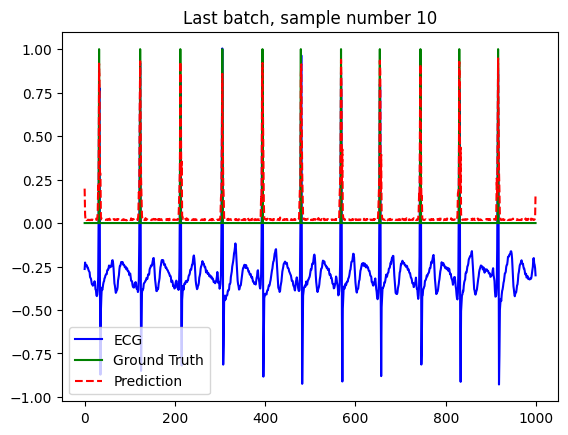

100%|██████████| 119/119 [02:11<00:00,  1.10s/it]



Train Loss: 0.1377
train Weighted Accuracy: 0.96142
train F1 Score: 0.88260
train TPR: 0.92503
train FPR: 0.00220
train TNR: 0.99780
train FNR: 0.07497



100%|██████████| 20/20 [00:03<00:00,  5.22it/s]



Validation Loss: 0.1244
validation Weighted Accuracy: 0.96955
validation F1 Score: 0.90340
validation TPR: 0.94093
validation FPR: 0.00183
validation TNR: 0.99817
validation FNR: 0.05907

====Epoch [5/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

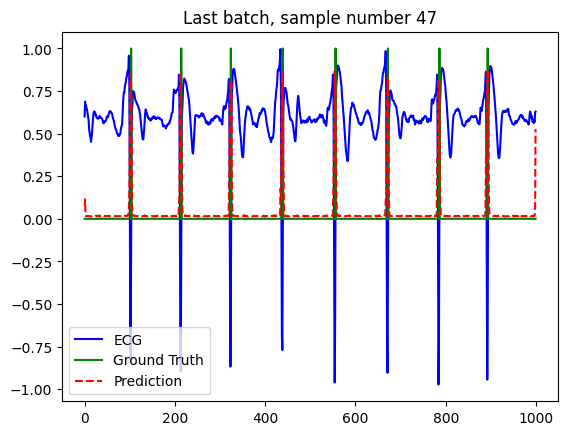

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.1244
train Weighted Accuracy: 0.97132
train F1 Score: 0.90113
train TPR: 0.94460
train FPR: 0.00195
train TNR: 0.99805
train FNR: 0.05540



100%|██████████| 20/20 [00:03<00:00,  5.11it/s]



Validation Loss: 0.1147
validation Weighted Accuracy: 0.97558
validation F1 Score: 0.91913
validation TPR: 0.95271
validation FPR: 0.00155
validation TNR: 0.99845
validation FNR: 0.04729

====Epoch [6/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

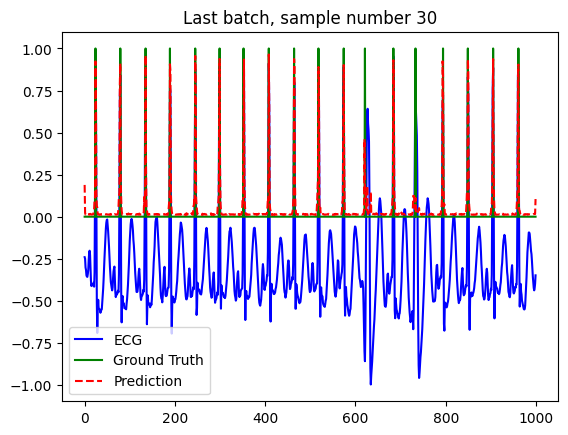

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.1159
train Weighted Accuracy: 0.97659
train F1 Score: 0.90732
train TPR: 0.95511
train FPR: 0.00193
train TNR: 0.99807
train FNR: 0.04489



100%|██████████| 20/20 [00:03<00:00,  5.09it/s]



Validation Loss: 0.1080
validation Weighted Accuracy: 0.97915
validation F1 Score: 0.92221
validation TPR: 0.95987
validation FPR: 0.00157
validation TNR: 0.99843
validation FNR: 0.04013

====Epoch [7/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

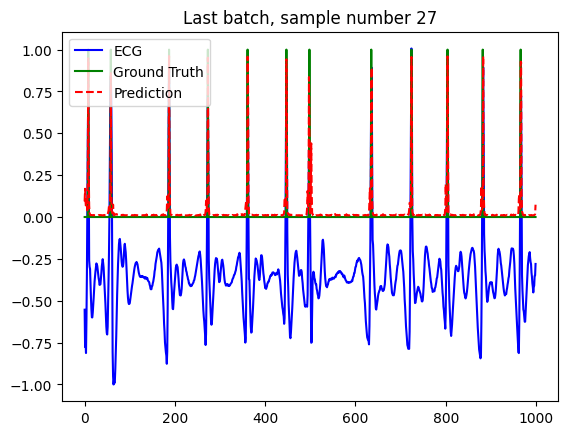

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.1097
train Weighted Accuracy: 0.97969
train F1 Score: 0.90820
train TPR: 0.96138
train FPR: 0.00200
train TNR: 0.99800
train FNR: 0.03862



100%|██████████| 20/20 [00:03<00:00,  5.16it/s]



Validation Loss: 0.1029
validation Weighted Accuracy: 0.98168
validation F1 Score: 0.92261
validation TPR: 0.96500
validation FPR: 0.00163
validation TNR: 0.99837
validation FNR: 0.03500

====Epoch [8/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

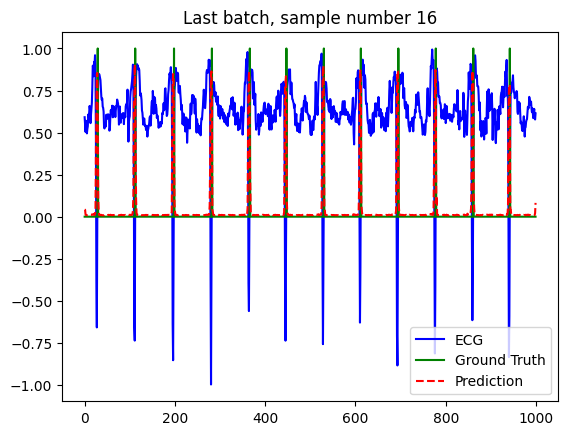

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.1050
train Weighted Accuracy: 0.98210
train F1 Score: 0.90690
train TPR: 0.96631
train FPR: 0.00211
train TNR: 0.99789
train FNR: 0.03369



100%|██████████| 20/20 [00:03<00:00,  5.22it/s]



Validation Loss: 0.0989
validation Weighted Accuracy: 0.98317
validation F1 Score: 0.92120
validation TPR: 0.96806
validation FPR: 0.00172
validation TNR: 0.99828
validation FNR: 0.03194

====Epoch [9/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

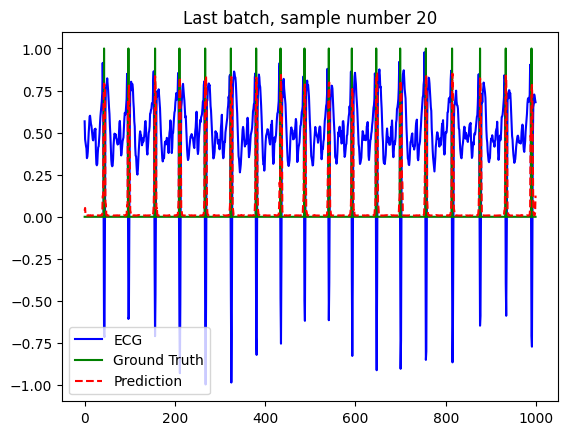

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.1012
train Weighted Accuracy: 0.98370
train F1 Score: 0.90622
train TPR: 0.96958
train FPR: 0.00219
train TNR: 0.99781
train FNR: 0.03042



100%|██████████| 20/20 [00:03<00:00,  5.17it/s]



Validation Loss: 0.0956
validation Weighted Accuracy: 0.98428
validation F1 Score: 0.92307
validation TPR: 0.97025
validation FPR: 0.00170
validation TNR: 0.99830
validation FNR: 0.02975

====Epoch [10/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

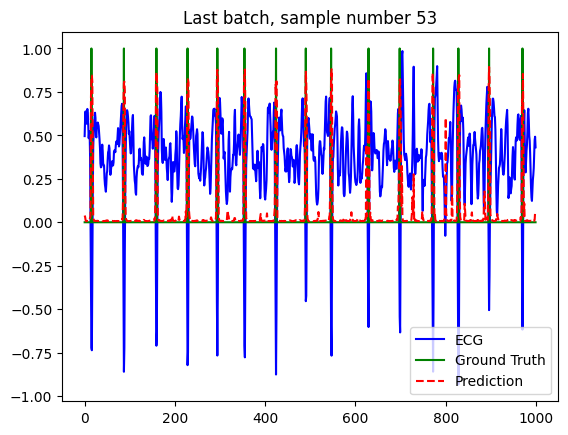

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0981
train Weighted Accuracy: 0.98488
train F1 Score: 0.90647
train TPR: 0.97197
train FPR: 0.00222
train TNR: 0.99778
train FNR: 0.02803



100%|██████████| 20/20 [00:03<00:00,  5.22it/s]



Validation Loss: 0.0928
validation Weighted Accuracy: 0.98468
validation F1 Score: 0.92522
validation TPR: 0.97100
validation FPR: 0.00165
validation TNR: 0.99835
validation FNR: 0.02900

====Epoch [11/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

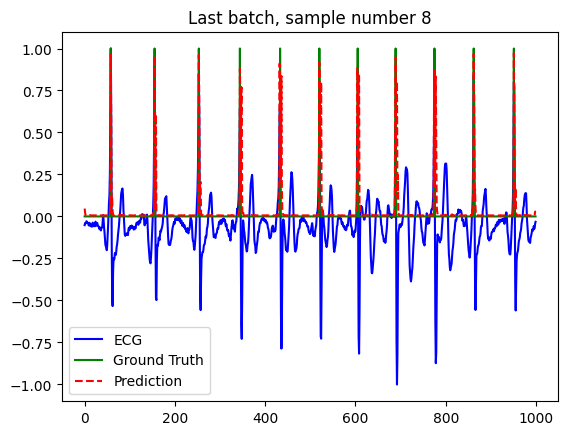

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0952
train Weighted Accuracy: 0.98554
train F1 Score: 0.90648
train TPR: 0.97332
train FPR: 0.00224
train TNR: 0.99776
train FNR: 0.02668



100%|██████████| 20/20 [00:03<00:00,  5.07it/s]



Validation Loss: 0.0902
validation Weighted Accuracy: 0.98531
validation F1 Score: 0.92563
validation TPR: 0.97228
validation FPR: 0.00165
validation TNR: 0.99835
validation FNR: 0.02772

====Epoch [12/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

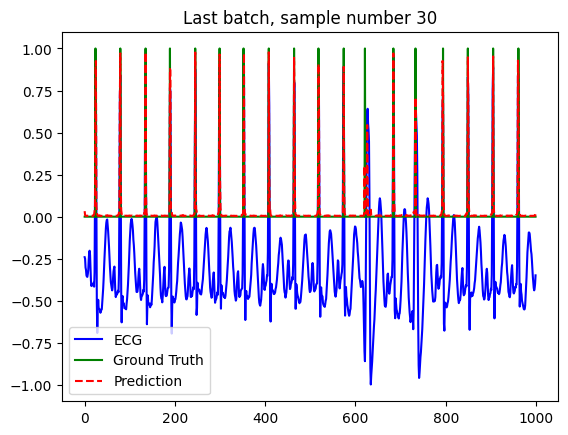

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0927
train Weighted Accuracy: 0.98667
train F1 Score: 0.90638
train TPR: 0.97561
train FPR: 0.00227
train TNR: 0.99773
train FNR: 0.02439



100%|██████████| 20/20 [00:03<00:00,  5.15it/s]



Validation Loss: 0.0880
validation Weighted Accuracy: 0.98584
validation F1 Score: 0.92413
validation TPR: 0.97339
validation FPR: 0.00171
validation TNR: 0.99829
validation FNR: 0.02661

====Epoch [13/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

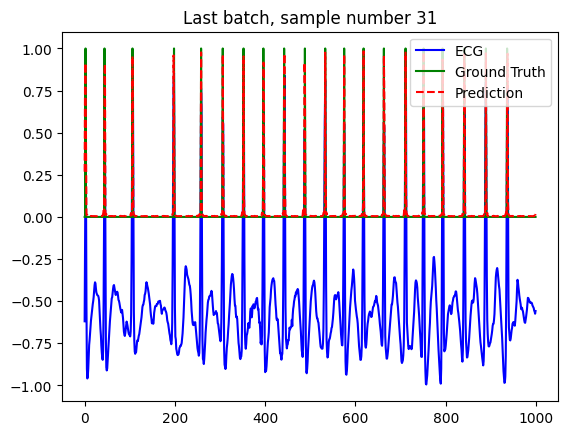

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0904
train Weighted Accuracy: 0.98715
train F1 Score: 0.90584
train TPR: 0.97660
train FPR: 0.00231
train TNR: 0.99769
train FNR: 0.02340



100%|██████████| 20/20 [00:03<00:00,  5.19it/s]



Validation Loss: 0.0858
validation Weighted Accuracy: 0.98698
validation F1 Score: 0.92206
validation TPR: 0.97578
validation FPR: 0.00181
validation TNR: 0.99819
validation FNR: 0.02422

====Epoch [14/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

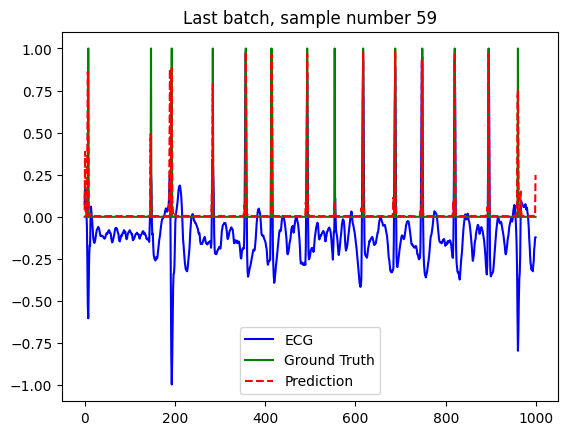

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0883
train Weighted Accuracy: 0.98751
train F1 Score: 0.90575
train TPR: 0.97735
train FPR: 0.00232
train TNR: 0.99768
train FNR: 0.02265



100%|██████████| 20/20 [00:03<00:00,  5.07it/s]



Validation Loss: 0.0841
validation Weighted Accuracy: 0.98663
validation F1 Score: 0.92354
validation TPR: 0.97502
validation FPR: 0.00176
validation TNR: 0.99824
validation FNR: 0.02498

====Epoch [15/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

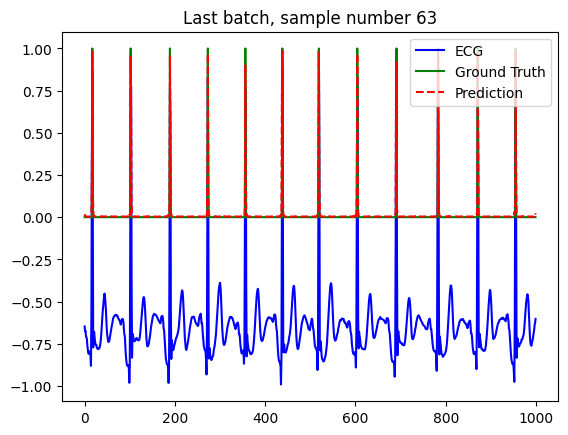

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0868
train Weighted Accuracy: 0.98780
train F1 Score: 0.90528
train TPR: 0.97794
train FPR: 0.00234
train TNR: 0.99766
train FNR: 0.02206



100%|██████████| 20/20 [00:03<00:00,  5.07it/s]



Validation Loss: 0.0823
validation Weighted Accuracy: 0.98788
validation F1 Score: 0.92051
validation TPR: 0.97765
validation FPR: 0.00188
validation TNR: 0.99812
validation FNR: 0.02235

====Epoch [16/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

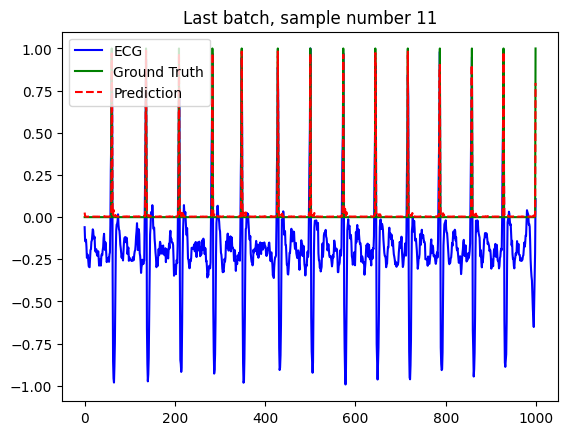

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0852
train Weighted Accuracy: 0.98818
train F1 Score: 0.90543
train TPR: 0.97871
train FPR: 0.00235
train TNR: 0.99765
train FNR: 0.02129



100%|██████████| 20/20 [00:03<00:00,  5.16it/s]



Validation Loss: 0.0811
validation Weighted Accuracy: 0.98758
validation F1 Score: 0.92129
validation TPR: 0.97701
validation FPR: 0.00185
validation TNR: 0.99815
validation FNR: 0.02299

====Epoch [17/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.10s/it]

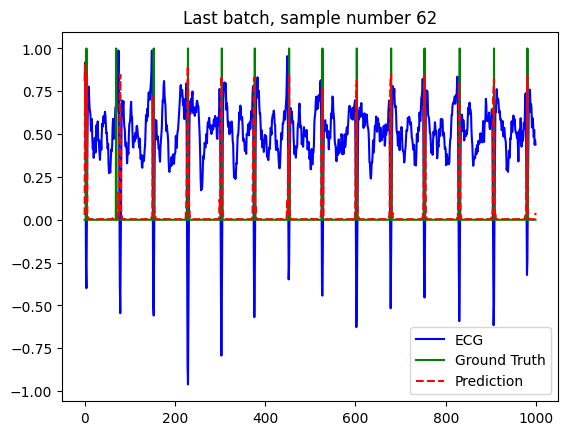

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0839
train Weighted Accuracy: 0.98852
train F1 Score: 0.90539
train TPR: 0.97941
train FPR: 0.00236
train TNR: 0.99764
train FNR: 0.02059



100%|██████████| 20/20 [00:03<00:00,  5.16it/s]



Validation Loss: 0.0797
validation Weighted Accuracy: 0.98825
validation F1 Score: 0.92129
validation TPR: 0.97836
validation FPR: 0.00187
validation TNR: 0.99813
validation FNR: 0.02164

====Epoch [18/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

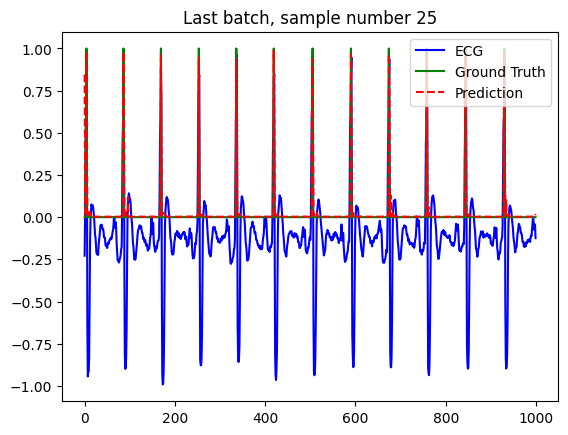

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0825
train Weighted Accuracy: 0.98885
train F1 Score: 0.90636
train TPR: 0.98005
train FPR: 0.00234
train TNR: 0.99766
train FNR: 0.01995



100%|██████████| 20/20 [00:03<00:00,  5.08it/s]



Validation Loss: 0.0784
validation Weighted Accuracy: 0.98836
validation F1 Score: 0.92255
validation TPR: 0.97856
validation FPR: 0.00184
validation TNR: 0.99816
validation FNR: 0.02144

====Epoch [19/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

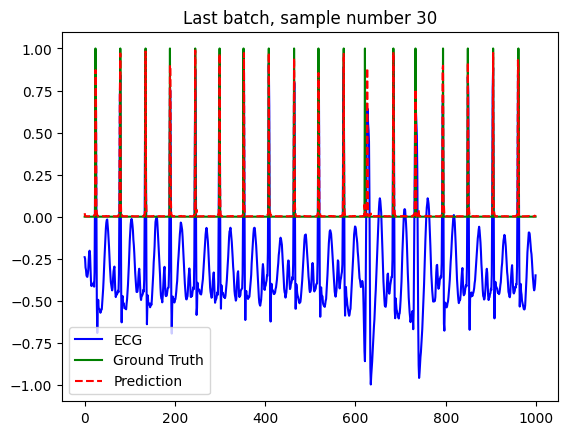

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0813
train Weighted Accuracy: 0.98919
train F1 Score: 0.90730
train TPR: 0.98070
train FPR: 0.00233
train TNR: 0.99767
train FNR: 0.01930



100%|██████████| 20/20 [00:03<00:00,  5.15it/s]



Validation Loss: 0.0771
validation Weighted Accuracy: 0.98907
validation F1 Score: 0.92260
validation TPR: 0.97999
validation FPR: 0.00186
validation TNR: 0.99814
validation FNR: 0.02001

====Epoch [20/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

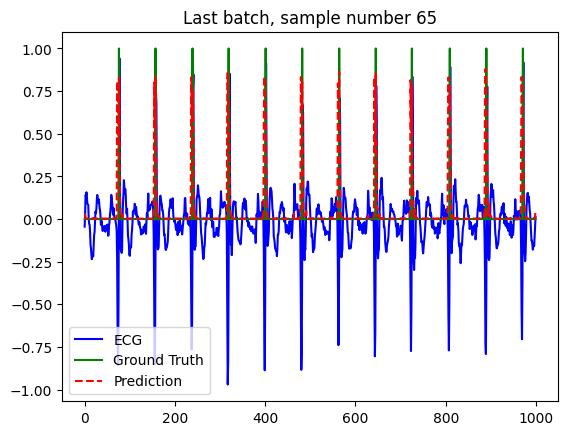

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0800
train Weighted Accuracy: 0.98943
train F1 Score: 0.90748
train TPR: 0.98118
train FPR: 0.00233
train TNR: 0.99767
train FNR: 0.01882



100%|██████████| 20/20 [00:03<00:00,  5.08it/s]



Validation Loss: 0.0760
validation Weighted Accuracy: 0.98973
validation F1 Score: 0.92375
validation TPR: 0.98131
validation FPR: 0.00184
validation TNR: 0.99816
validation FNR: 0.01869

====Epoch [21/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

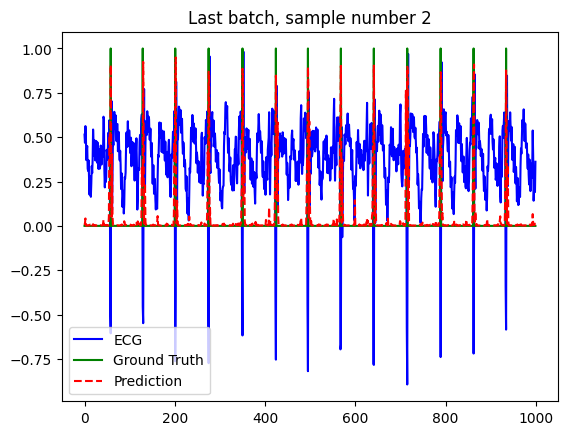

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0789
train Weighted Accuracy: 0.98984
train F1 Score: 0.90916
train TPR: 0.98196
train FPR: 0.00229
train TNR: 0.99771
train FNR: 0.01804



100%|██████████| 20/20 [00:03<00:00,  5.18it/s]



Validation Loss: 0.0749
validation Weighted Accuracy: 0.99048
validation F1 Score: 0.92372
validation TPR: 0.98282
validation FPR: 0.00187
validation TNR: 0.99813
validation FNR: 0.01718

====Epoch [22/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

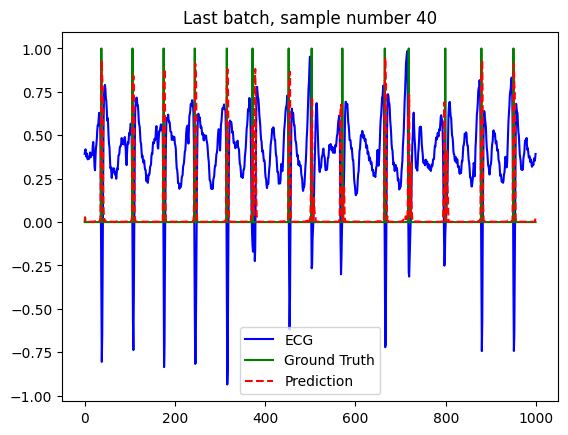

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0779
train Weighted Accuracy: 0.98978
train F1 Score: 0.91031
train TPR: 0.98181
train FPR: 0.00225
train TNR: 0.99775
train FNR: 0.01819



100%|██████████| 20/20 [00:03<00:00,  5.21it/s]



Validation Loss: 0.0739
validation Weighted Accuracy: 0.99142
validation F1 Score: 0.92152
validation TPR: 0.98481
validation FPR: 0.00196
validation TNR: 0.99804
validation FNR: 0.01519

====Epoch [23/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

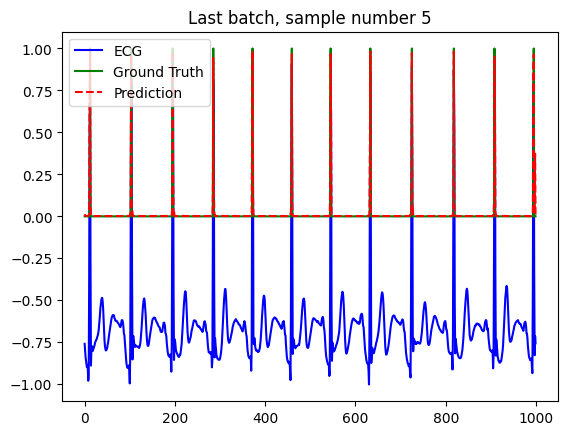

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0769
train Weighted Accuracy: 0.99003
train F1 Score: 0.91065
train TPR: 0.98230
train FPR: 0.00225
train TNR: 0.99775
train FNR: 0.01770



100%|██████████| 20/20 [00:03<00:00,  5.16it/s]



Validation Loss: 0.0729
validation Weighted Accuracy: 0.99147
validation F1 Score: 0.92317
validation TPR: 0.98485
validation FPR: 0.00191
validation TNR: 0.99809
validation FNR: 0.01515

====Epoch [24/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

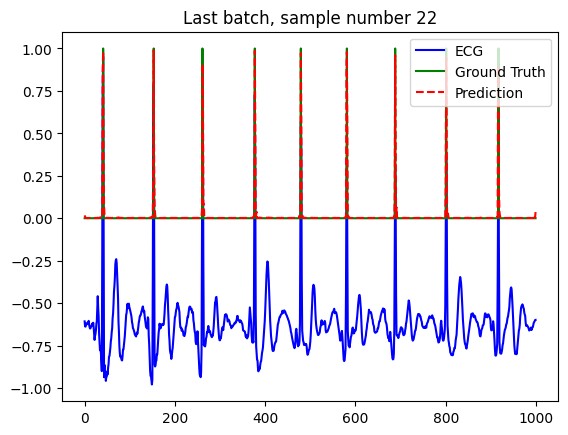

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0757
train Weighted Accuracy: 0.99025
train F1 Score: 0.91132
train TPR: 0.98274
train FPR: 0.00223
train TNR: 0.99777
train FNR: 0.01726



100%|██████████| 20/20 [00:03<00:00,  5.21it/s]



Validation Loss: 0.0720
validation Weighted Accuracy: 0.99159
validation F1 Score: 0.92465
validation TPR: 0.98504
validation FPR: 0.00187
validation TNR: 0.99813
validation FNR: 0.01496

====Epoch [25/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

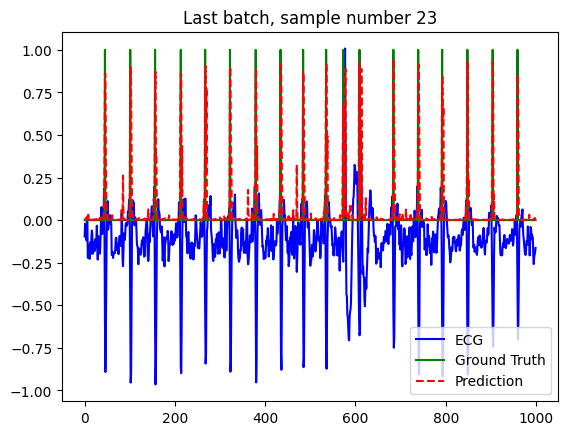

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0748
train Weighted Accuracy: 0.99052
train F1 Score: 0.91251
train TPR: 0.98324
train FPR: 0.00221
train TNR: 0.99779
train FNR: 0.01676



100%|██████████| 20/20 [00:03<00:00,  5.23it/s]



Validation Loss: 0.0709
validation Weighted Accuracy: 0.99211
validation F1 Score: 0.92176
validation TPR: 0.98620
validation FPR: 0.00198
validation TNR: 0.99802
validation FNR: 0.01380

====Epoch [26/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

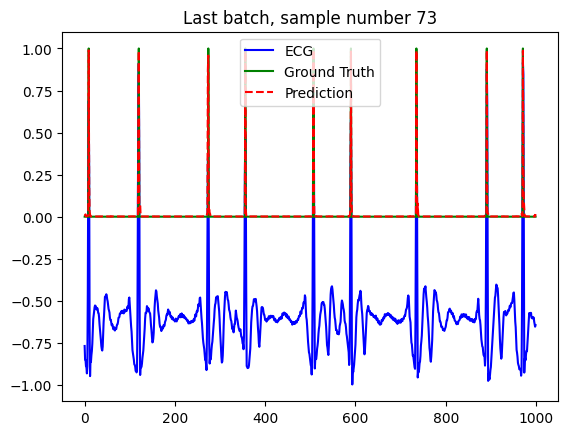

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0738
train Weighted Accuracy: 0.99037
train F1 Score: 0.91306
train TPR: 0.98292
train FPR: 0.00218
train TNR: 0.99782
train FNR: 0.01708



100%|██████████| 20/20 [00:03<00:00,  5.13it/s]



Validation Loss: 0.0702
validation Weighted Accuracy: 0.99188
validation F1 Score: 0.92365
validation TPR: 0.98568
validation FPR: 0.00191
validation TNR: 0.99809
validation FNR: 0.01432

====Epoch [27/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

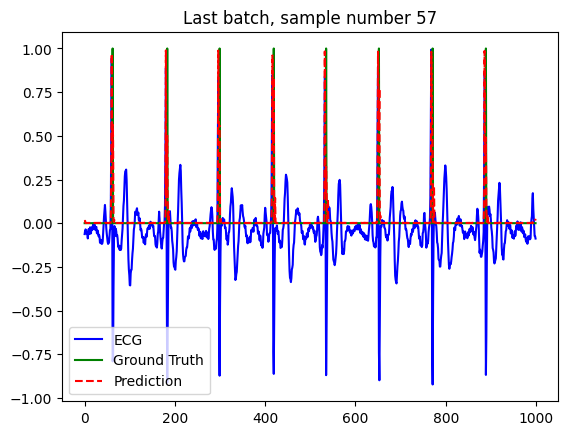

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0730
train Weighted Accuracy: 0.99054
train F1 Score: 0.91318
train TPR: 0.98326
train FPR: 0.00219
train TNR: 0.99781
train FNR: 0.01674



100%|██████████| 20/20 [00:03<00:00,  5.09it/s]



Validation Loss: 0.0691
validation Weighted Accuracy: 0.99232
validation F1 Score: 0.92510
validation TPR: 0.98652
validation FPR: 0.00188
validation TNR: 0.99812
validation FNR: 0.01348

====Epoch [28/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

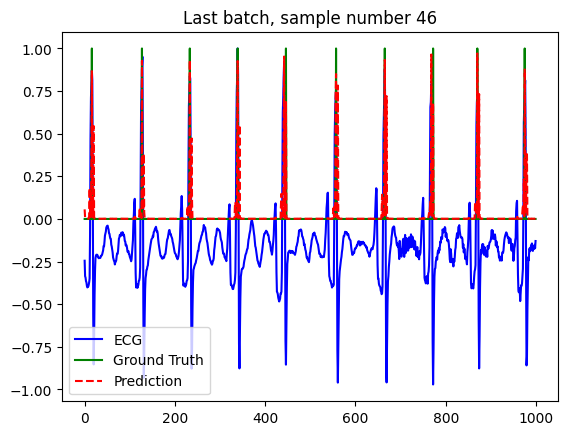

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0721
train Weighted Accuracy: 0.99077
train F1 Score: 0.91428
train TPR: 0.98369
train FPR: 0.00216
train TNR: 0.99784
train FNR: 0.01631



100%|██████████| 20/20 [00:03<00:00,  5.24it/s]



Validation Loss: 0.0682
validation Weighted Accuracy: 0.99245
validation F1 Score: 0.92476
validation TPR: 0.98679
validation FPR: 0.00190
validation TNR: 0.99810
validation FNR: 0.01321

====Epoch [29/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

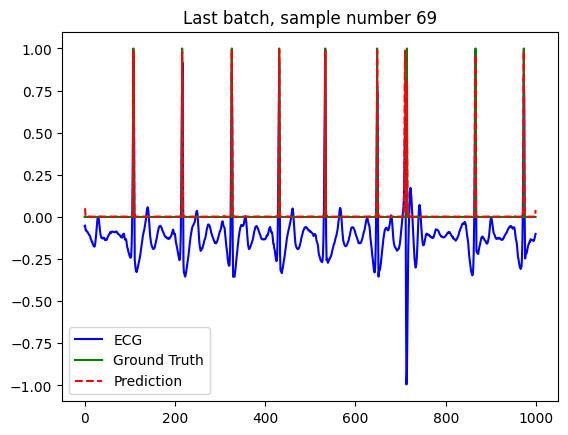

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0711
train Weighted Accuracy: 0.99085
train F1 Score: 0.91551
train TPR: 0.98383
train FPR: 0.00212
train TNR: 0.99788
train FNR: 0.01617



100%|██████████| 20/20 [00:03<00:00,  5.12it/s]



Validation Loss: 0.0674
validation Weighted Accuracy: 0.99247
validation F1 Score: 0.92645
validation TPR: 0.98679
validation FPR: 0.00185
validation TNR: 0.99815
validation FNR: 0.01321

====Epoch [30/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

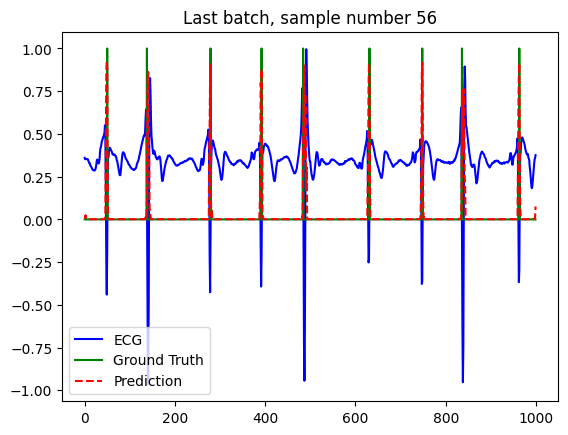

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0703
train Weighted Accuracy: 0.99093
train F1 Score: 0.91600
train TPR: 0.98397
train FPR: 0.00211
train TNR: 0.99789
train FNR: 0.01603



100%|██████████| 20/20 [00:03<00:00,  5.23it/s]



Validation Loss: 0.0666
validation Weighted Accuracy: 0.99275
validation F1 Score: 0.92523
validation TPR: 0.98739
validation FPR: 0.00189
validation TNR: 0.99811
validation FNR: 0.01261

====Epoch [31/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

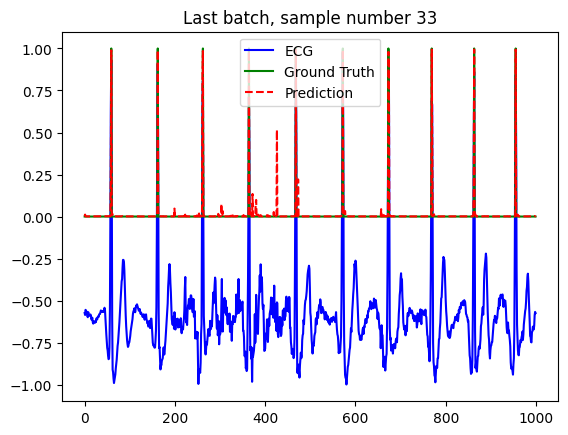

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0696
train Weighted Accuracy: 0.99095
train F1 Score: 0.91654
train TPR: 0.98399
train FPR: 0.00210
train TNR: 0.99790
train FNR: 0.01601



100%|██████████| 20/20 [00:03<00:00,  5.17it/s]



Validation Loss: 0.0658
validation Weighted Accuracy: 0.99296
validation F1 Score: 0.92506
validation TPR: 0.98783
validation FPR: 0.00190
validation TNR: 0.99810
validation FNR: 0.01217

====Epoch [32/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

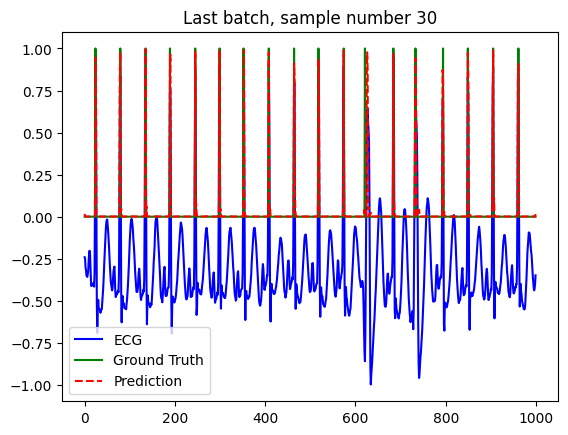

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0689
train Weighted Accuracy: 0.99089
train F1 Score: 0.91672
train TPR: 0.98386
train FPR: 0.00209
train TNR: 0.99791
train FNR: 0.01614



100%|██████████| 20/20 [00:03<00:00,  5.08it/s]



Validation Loss: 0.0651
validation Weighted Accuracy: 0.99297
validation F1 Score: 0.92716
validation TPR: 0.98779
validation FPR: 0.00184
validation TNR: 0.99816
validation FNR: 0.01221

====Epoch [33/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

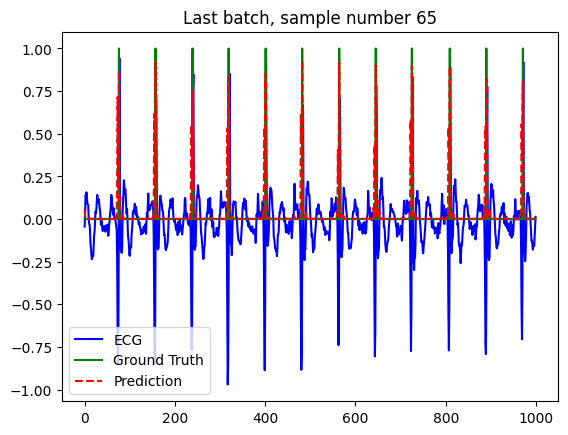

100%|██████████| 119/119 [02:11<00:00,  1.10s/it]



Train Loss: 0.0682
train Weighted Accuracy: 0.99105
train F1 Score: 0.91771
train TPR: 0.98416
train FPR: 0.00206
train TNR: 0.99794
train FNR: 0.01584



100%|██████████| 20/20 [00:03<00:00,  5.11it/s]



Validation Loss: 0.0644
validation Weighted Accuracy: 0.99299
validation F1 Score: 0.92829
validation TPR: 0.98779
validation FPR: 0.00181
validation TNR: 0.99819
validation FNR: 0.01221

====Epoch [34/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

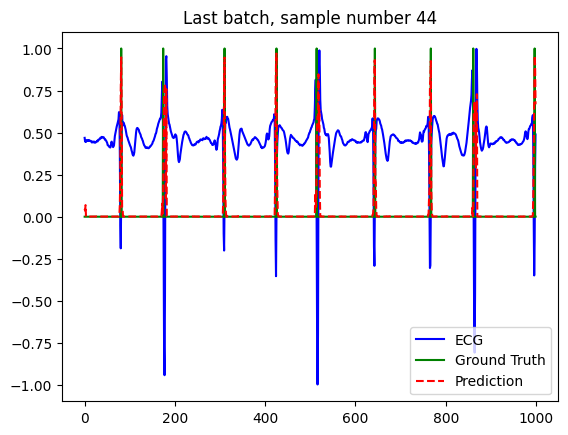

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0675
train Weighted Accuracy: 0.99097
train F1 Score: 0.91793
train TPR: 0.98398
train FPR: 0.00205
train TNR: 0.99795
train FNR: 0.01602



100%|██████████| 20/20 [00:03<00:00,  5.10it/s]



Validation Loss: 0.0638
validation Weighted Accuracy: 0.99333
validation F1 Score: 0.92611
validation TPR: 0.98854
validation FPR: 0.00188
validation TNR: 0.99812
validation FNR: 0.01146

====Epoch [35/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

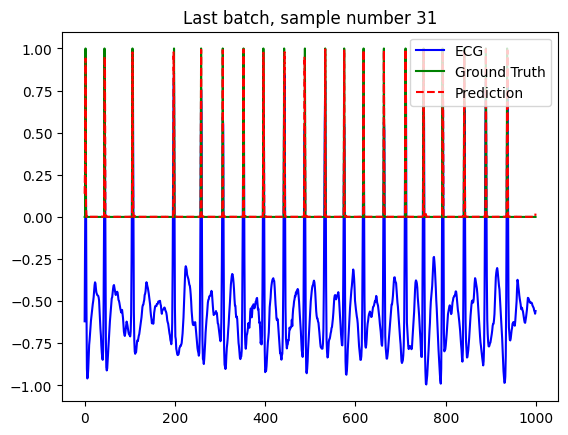

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0669
train Weighted Accuracy: 0.99127
train F1 Score: 0.91872
train TPR: 0.98458
train FPR: 0.00204
train TNR: 0.99796
train FNR: 0.01542



100%|██████████| 20/20 [00:03<00:00,  5.09it/s]



Validation Loss: 0.0632
validation Weighted Accuracy: 0.99315
validation F1 Score: 0.92834
validation TPR: 0.98811
validation FPR: 0.00181
validation TNR: 0.99819
validation FNR: 0.01189

====Epoch [36/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

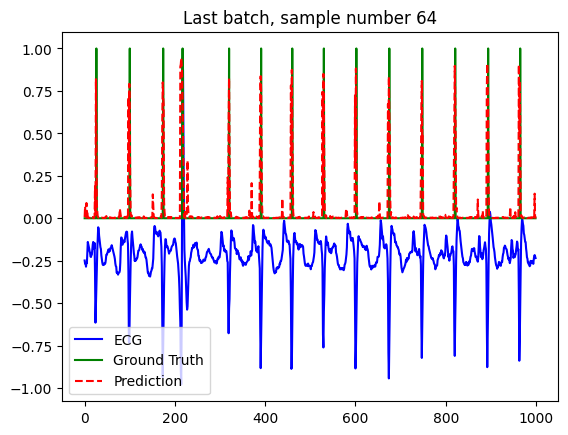

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0663
train Weighted Accuracy: 0.99103
train F1 Score: 0.91886
train TPR: 0.98408
train FPR: 0.00203
train TNR: 0.99797
train FNR: 0.01592



100%|██████████| 20/20 [00:03<00:00,  5.15it/s]



Validation Loss: 0.0626
validation Weighted Accuracy: 0.99317
validation F1 Score: 0.92824
validation TPR: 0.98815
validation FPR: 0.00181
validation TNR: 0.99819
validation FNR: 0.01185

====Epoch [37/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

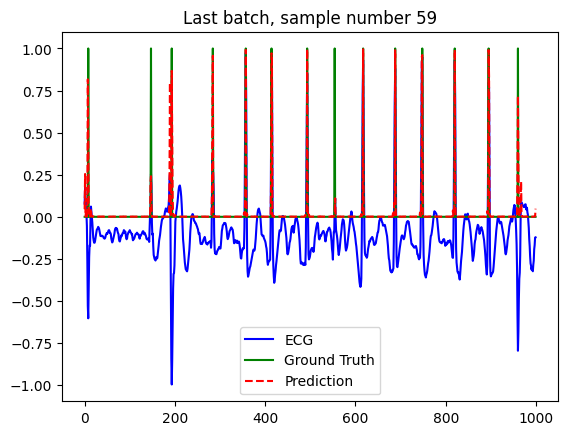

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0657
train Weighted Accuracy: 0.99120
train F1 Score: 0.92007
train TPR: 0.98439
train FPR: 0.00200
train TNR: 0.99800
train FNR: 0.01561



100%|██████████| 20/20 [00:03<00:00,  5.09it/s]



Validation Loss: 0.0621
validation Weighted Accuracy: 0.99299
validation F1 Score: 0.92832
validation TPR: 0.98779
validation FPR: 0.00180
validation TNR: 0.99820
validation FNR: 0.01221

====Epoch [38/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

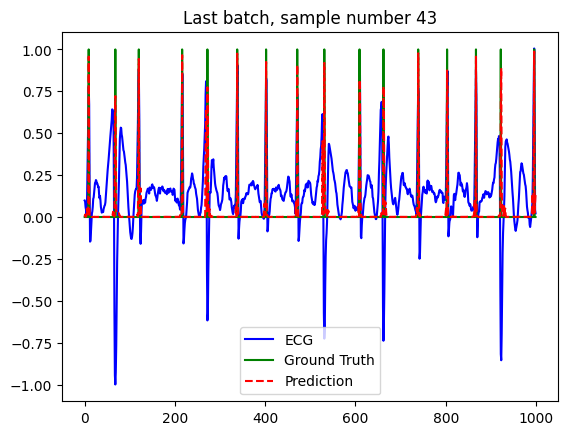

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0651
train Weighted Accuracy: 0.99116
train F1 Score: 0.92046
train TPR: 0.98430
train FPR: 0.00198
train TNR: 0.99802
train FNR: 0.01570



100%|██████████| 20/20 [00:03<00:00,  5.09it/s]



Validation Loss: 0.0614
validation Weighted Accuracy: 0.99330
validation F1 Score: 0.92900
validation TPR: 0.98839
validation FPR: 0.00179
validation TNR: 0.99821
validation FNR: 0.01161

====Epoch [39/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

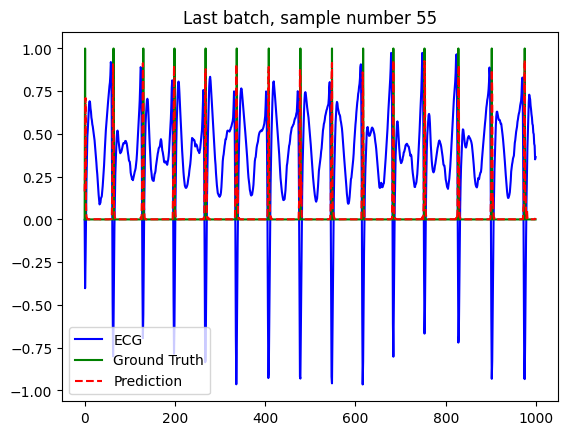

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0647
train Weighted Accuracy: 0.99138
train F1 Score: 0.92174
train TPR: 0.98471
train FPR: 0.00195
train TNR: 0.99805
train FNR: 0.01529



100%|██████████| 20/20 [00:03<00:00,  5.13it/s]



Validation Loss: 0.0613
validation Weighted Accuracy: 0.99362
validation F1 Score: 0.92725
validation TPR: 0.98910
validation FPR: 0.00186
validation TNR: 0.99814
validation FNR: 0.01090

====Epoch [40/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

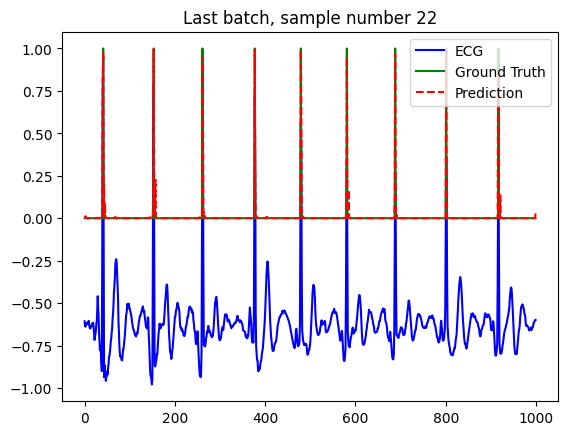

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0643
train Weighted Accuracy: 0.99121
train F1 Score: 0.92197
train TPR: 0.98435
train FPR: 0.00194
train TNR: 0.99806
train FNR: 0.01565



100%|██████████| 20/20 [00:03<00:00,  5.24it/s]



Validation Loss: 0.0607
validation Weighted Accuracy: 0.99313
validation F1 Score: 0.93074
validation TPR: 0.98799
validation FPR: 0.00174
validation TNR: 0.99826
validation FNR: 0.01201

====Epoch [41/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

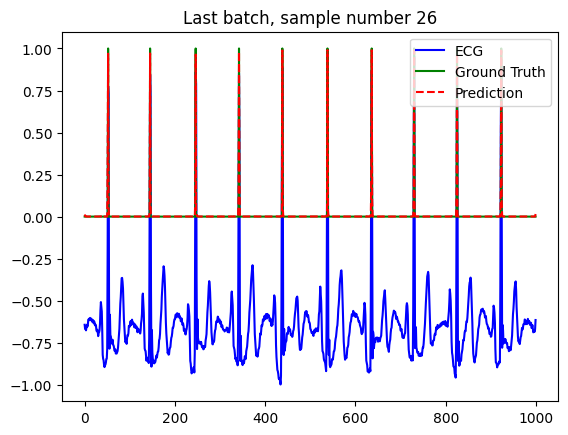

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0637
train Weighted Accuracy: 0.99137
train F1 Score: 0.92315
train TPR: 0.98465
train FPR: 0.00191
train TNR: 0.99809
train FNR: 0.01535



100%|██████████| 20/20 [00:03<00:00,  5.21it/s]



Validation Loss: 0.0603
validation Weighted Accuracy: 0.99334
validation F1 Score: 0.93057
validation TPR: 0.98843
validation FPR: 0.00175
validation TNR: 0.99825
validation FNR: 0.01157

====Epoch [42/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

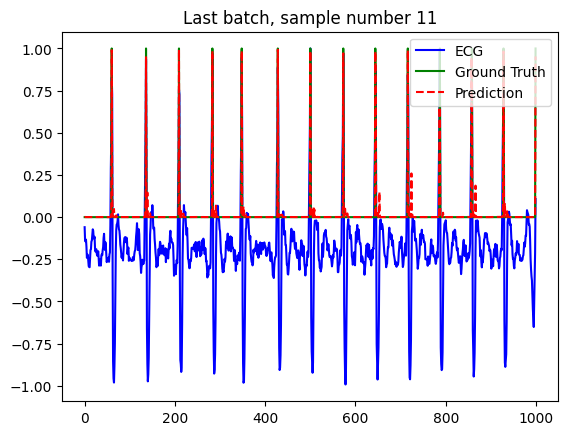

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0633
train Weighted Accuracy: 0.99122
train F1 Score: 0.92351
train TPR: 0.98433
train FPR: 0.00189
train TNR: 0.99811
train FNR: 0.01567



100%|██████████| 20/20 [00:03<00:00,  5.11it/s]



Validation Loss: 0.0599
validation Weighted Accuracy: 0.99362
validation F1 Score: 0.92948
validation TPR: 0.98902
validation FPR: 0.00179
validation TNR: 0.99821
validation FNR: 0.01098

====Epoch [43/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

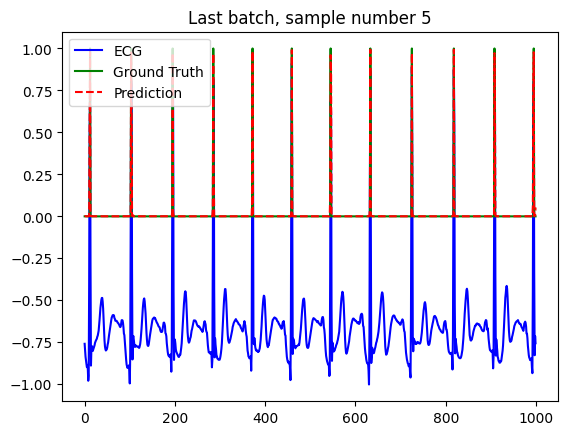

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0628
train Weighted Accuracy: 0.99146
train F1 Score: 0.92461
train TPR: 0.98479
train FPR: 0.00187
train TNR: 0.99813
train FNR: 0.01521



100%|██████████| 20/20 [00:03<00:00,  5.15it/s]



Validation Loss: 0.0593
validation Weighted Accuracy: 0.99334
validation F1 Score: 0.93303
validation TPR: 0.98835
validation FPR: 0.00167
validation TNR: 0.99833
validation FNR: 0.01165

====Epoch [44/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

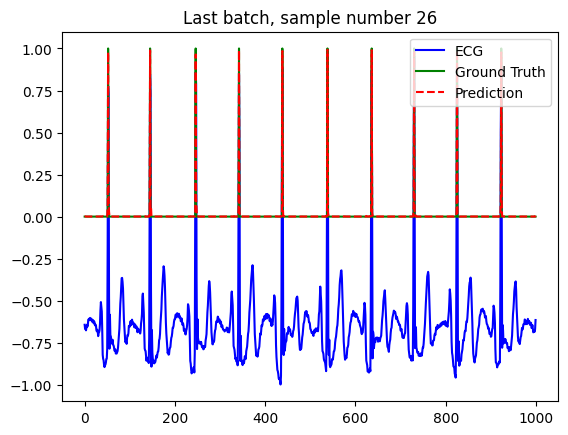

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0624
train Weighted Accuracy: 0.99130
train F1 Score: 0.92496
train TPR: 0.98444
train FPR: 0.00185
train TNR: 0.99815
train FNR: 0.01556



100%|██████████| 20/20 [00:03<00:00,  5.10it/s]



Validation Loss: 0.0590
validation Weighted Accuracy: 0.99319
validation F1 Score: 0.93483
validation TPR: 0.98799
validation FPR: 0.00162
validation TNR: 0.99838
validation FNR: 0.01201

====Epoch [45/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

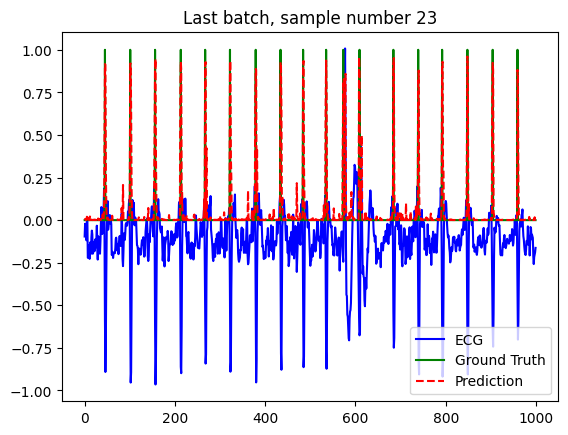

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0621
train Weighted Accuracy: 0.99149
train F1 Score: 0.92555
train TPR: 0.98481
train FPR: 0.00184
train TNR: 0.99816
train FNR: 0.01519



100%|██████████| 20/20 [00:03<00:00,  5.10it/s]



Validation Loss: 0.0586
validation Weighted Accuracy: 0.99335
validation F1 Score: 0.93398
validation TPR: 0.98835
validation FPR: 0.00165
validation TNR: 0.99835
validation FNR: 0.01165

====Epoch [46/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

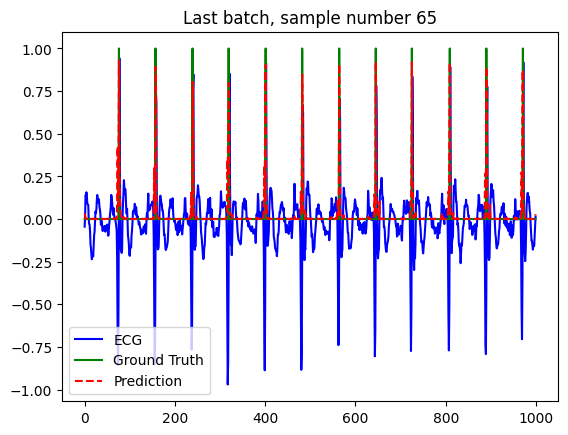

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0616
train Weighted Accuracy: 0.99153
train F1 Score: 0.92639
train TPR: 0.98488
train FPR: 0.00182
train TNR: 0.99818
train FNR: 0.01512



100%|██████████| 20/20 [00:03<00:00,  5.20it/s]



Validation Loss: 0.0583
validation Weighted Accuracy: 0.99374
validation F1 Score: 0.93230
validation TPR: 0.98918
validation FPR: 0.00171
validation TNR: 0.99829
validation FNR: 0.01082

====Epoch [47/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

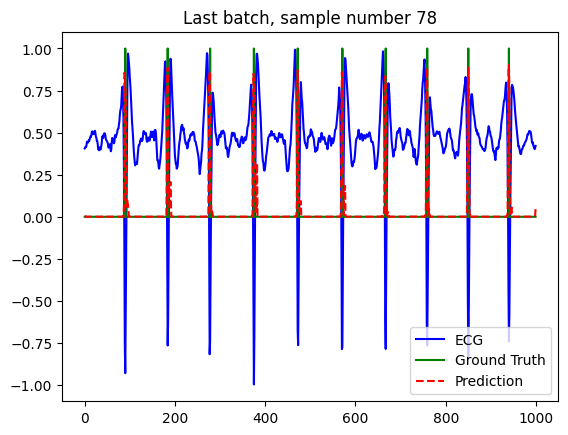

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0614
train Weighted Accuracy: 0.99150
train F1 Score: 0.92675
train TPR: 0.98479
train FPR: 0.00180
train TNR: 0.99820
train FNR: 0.01521



100%|██████████| 20/20 [00:03<00:00,  5.21it/s]



Validation Loss: 0.0580
validation Weighted Accuracy: 0.99343
validation F1 Score: 0.93441
validation TPR: 0.98850
validation FPR: 0.00164
validation TNR: 0.99836
validation FNR: 0.01150

====Epoch [48/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

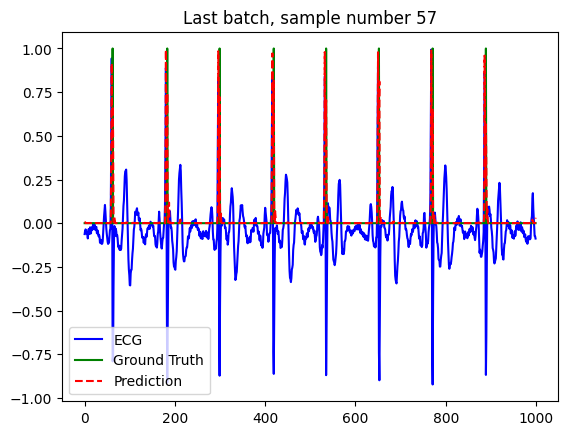

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0609
train Weighted Accuracy: 0.99154
train F1 Score: 0.92773
train TPR: 0.98486
train FPR: 0.00178
train TNR: 0.99822
train FNR: 0.01514



100%|██████████| 20/20 [00:03<00:00,  5.08it/s]



Validation Loss: 0.0578
validation Weighted Accuracy: 0.99326
validation F1 Score: 0.93620
validation TPR: 0.98811
validation FPR: 0.00158
validation TNR: 0.99842
validation FNR: 0.01189

====Epoch [49/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

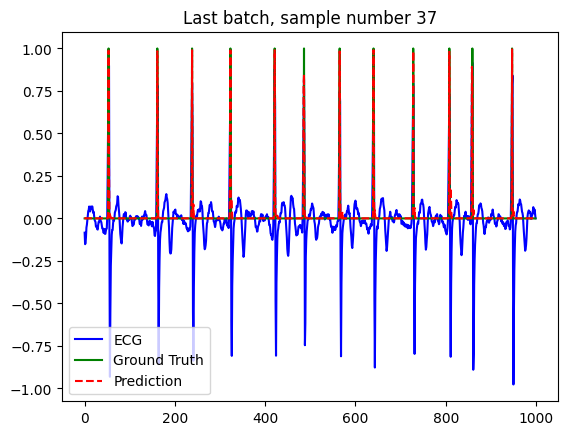

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0606
train Weighted Accuracy: 0.99132
train F1 Score: 0.92803
train TPR: 0.98441
train FPR: 0.00176
train TNR: 0.99824
train FNR: 0.01559



100%|██████████| 20/20 [00:03<00:00,  5.10it/s]



Validation Loss: 0.0572
validation Weighted Accuracy: 0.99320
validation F1 Score: 0.93721
validation TPR: 0.98795
validation FPR: 0.00155
validation TNR: 0.99845
validation FNR: 0.01205

====Epoch [50/50]====


 99%|█████████▉| 118/119 [02:09<00:01,  1.09s/it]

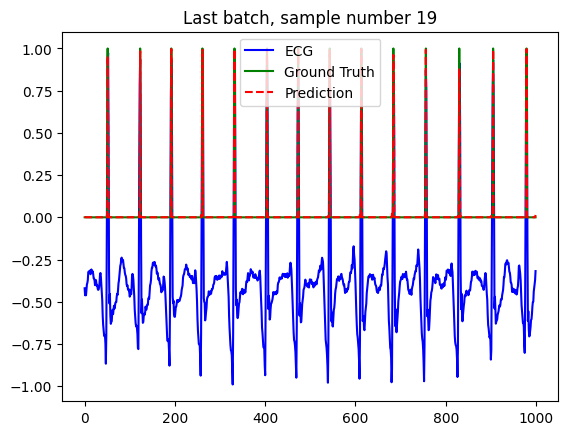

100%|██████████| 119/119 [02:10<00:00,  1.10s/it]



Train Loss: 0.0603
train Weighted Accuracy: 0.99153
train F1 Score: 0.92842
train TPR: 0.98482
train FPR: 0.00175
train TNR: 0.99825
train FNR: 0.01518



100%|██████████| 20/20 [00:03<00:00,  5.09it/s]



Validation Loss: 0.0569
validation Weighted Accuracy: 0.99355
validation F1 Score: 0.93546
validation TPR: 0.98870
validation FPR: 0.00161
validation TNR: 0.99839
validation FNR: 0.01130



In [6]:
model.train_model(x_train=x_train, y_train=y_train, epochs=epochs, batch_size=batch_size, x_val=x_val, y_val=y_val)

In [7]:
import pickle
with open("./metrics/TNET.pkl", "wb") as f:
  pickle.dump(model.get_metrics(), f)

In [2]:
with open("./metrics/TNET.pkl", "rb") as f:
  metrics = pickle.load(f)

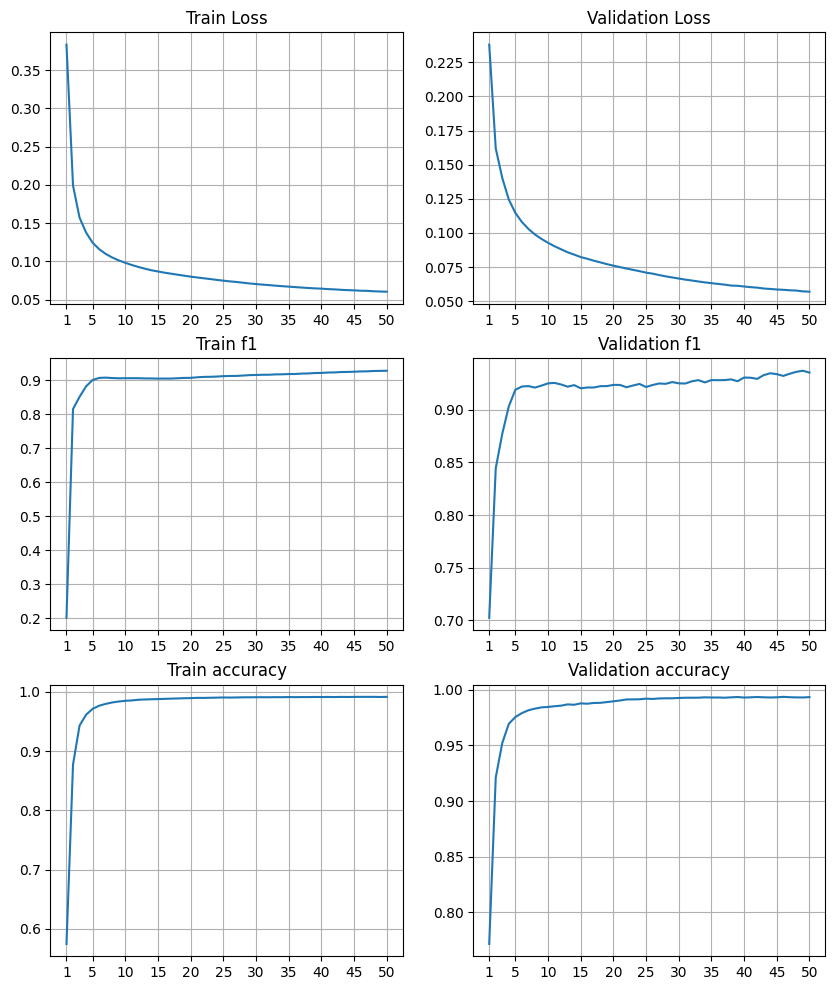

In [3]:
plot_metrics(metrics)

In [8]:
model.test_model(x_test, y_test)

100%|██████████| 396/396 [00:08<00:00, 48.77it/s]



Test Loss: 0.0568
test Weighted Accuracy: 0.99344
test F1 Score: 0.93739
test TPR: 0.98842
test FPR: 0.00155
test TNR: 0.99845
test FNR: 0.01158



## Testing with Apnea-ecg

In [5]:
x , y = load_physionet_ecgs(path=apnea_ecg_path, annotation_file_extension="qrs", window_in_seconds=10, force_new=False, expand=False, denoise=True)

In [7]:
x_test = np.expand_dims(x, axis=2)
y_test = np.expand_dims(y, axis=2)

  0%|          | 0/20330 [00:00<?, ?it/s]e:\anaconda3\envs\torch\Lib\site-packages\torch\nn\functional.py:5504: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


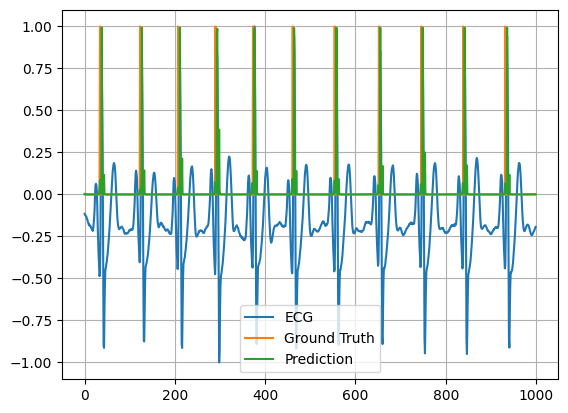

 10%|▉         | 2029/20330 [00:41<05:58, 51.07it/s]

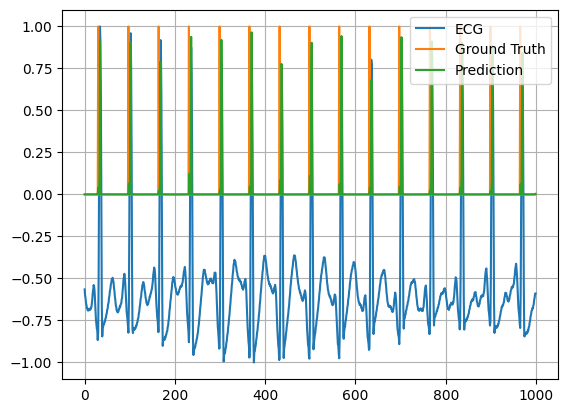

 20%|█▉        | 4063/20330 [01:22<05:22, 50.50it/s]

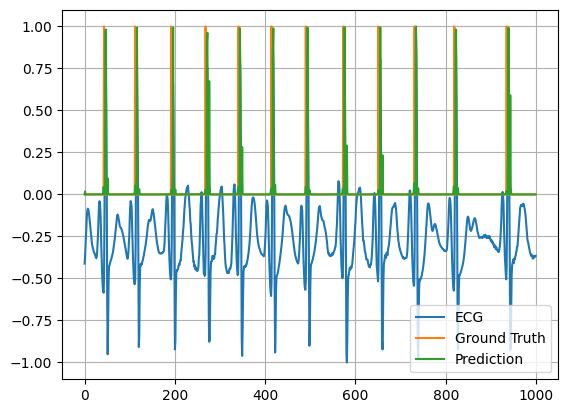

 30%|███       | 6099/20330 [02:03<06:18, 37.64it/s]

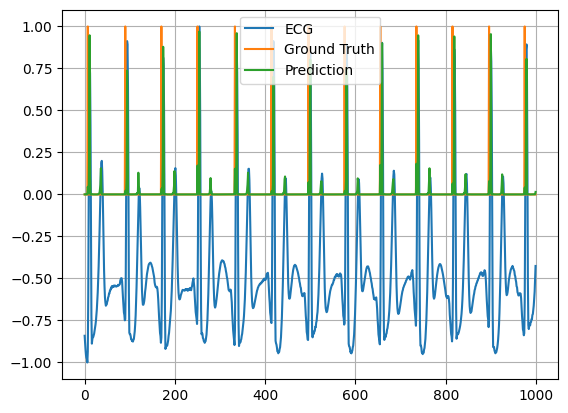

 40%|███▉      | 8130/20330 [02:44<03:57, 51.32it/s]

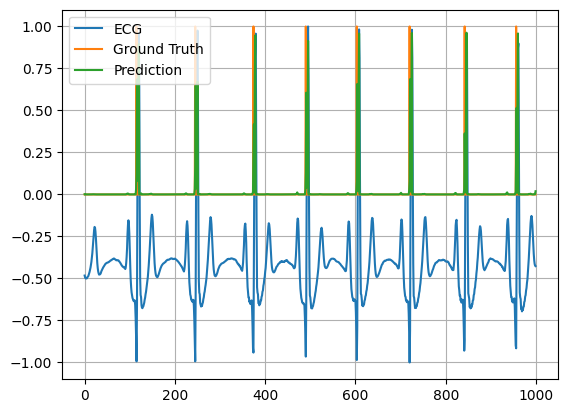

 50%|████▉     | 10164/20330 [03:25<03:21, 50.50it/s]

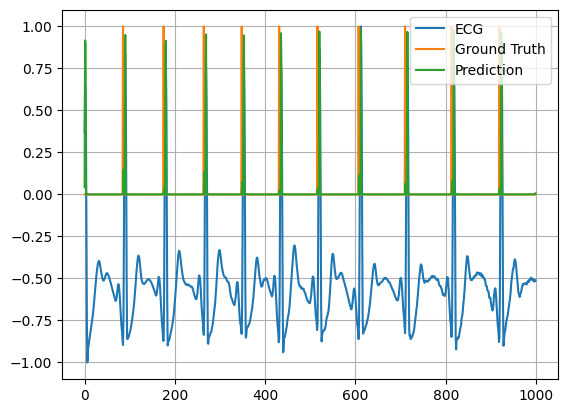

 60%|█████▉    | 12194/20330 [04:05<02:38, 51.43it/s]

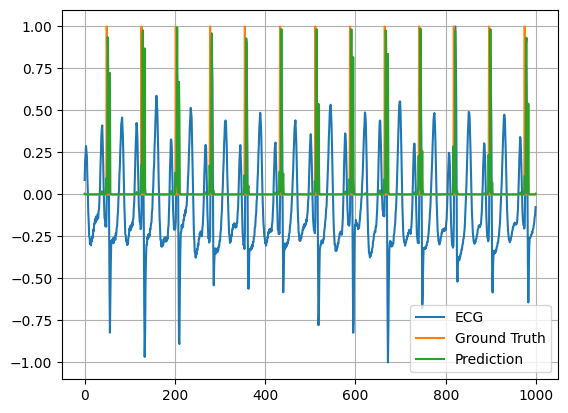

 70%|██████▉   | 14227/20330 [04:46<01:58, 51.35it/s]

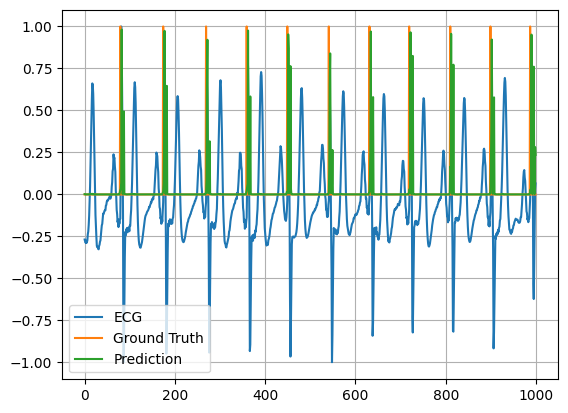

 80%|███████▉  | 16262/20330 [05:27<01:19, 50.92it/s]

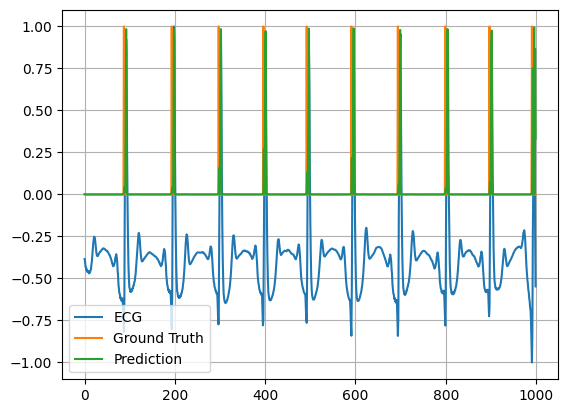

 90%|█████████ | 18297/20330 [06:08<00:40, 50.23it/s]

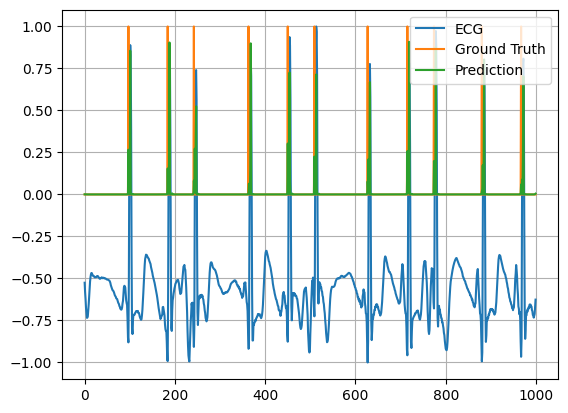

100%|██████████| 20330/20330 [06:47<00:00, 49.91it/s]



Test Loss: 0.4680
test Weighted Accuracy: 0.98478
test F1 Score: 0.81804
test TPR: 0.97411
test FPR: 0.00454
test TNR: 0.99546
test FNR: 0.02589



In [11]:
model.test_model(x_test, y_test, plot=True)

### Test with own ECG

In [22]:
import matplotlib.pyplot as plt
from customLib.preprocess import split_signal

In [6]:
my_ecg = np.load("E:\\ml-data\\masters-thesis\\myDataset\\Patryk\\07-05-24_16_56.npy")

In [17]:
ecgs = split_signal(signal=my_ecg, window_in_seconds=10, fs=250, normalize=True, denoise=True)
ecgs = np.array(ecgs)
# ecgs = np.expand_dims(ecgs, 2)
print("Shpae: ", ecgs.shape)

Shpae:  (66, 2500)


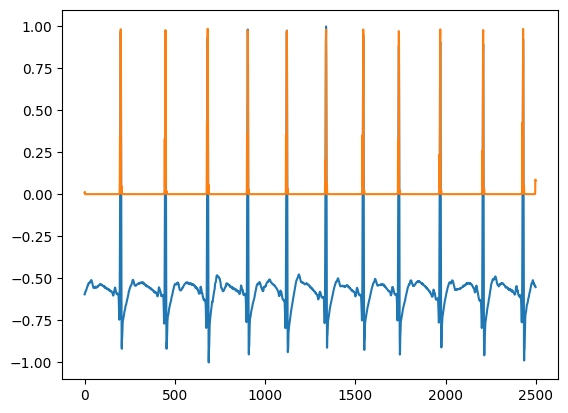

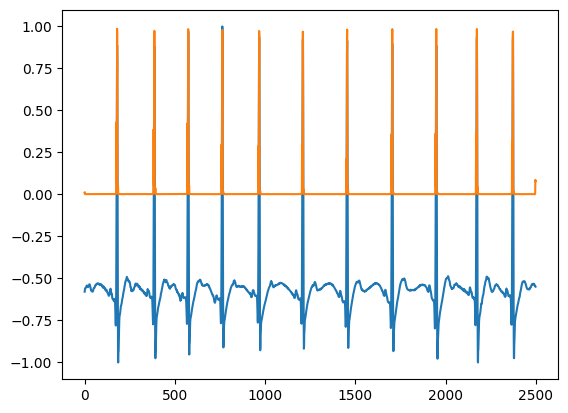

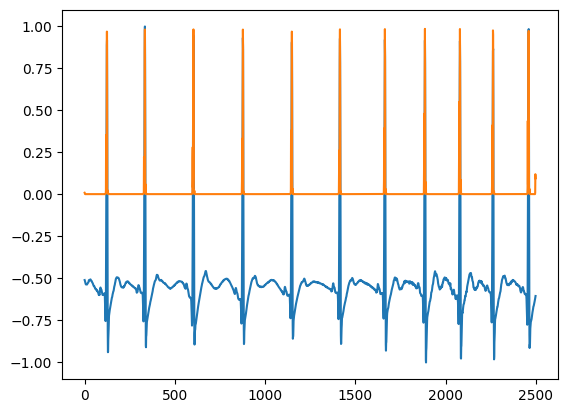

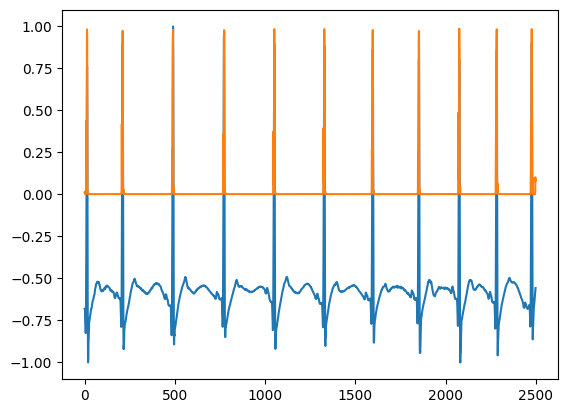

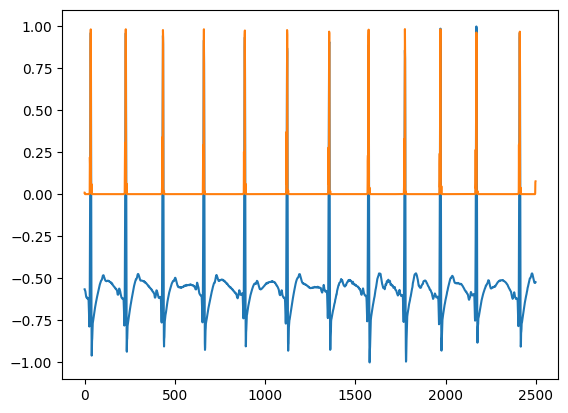

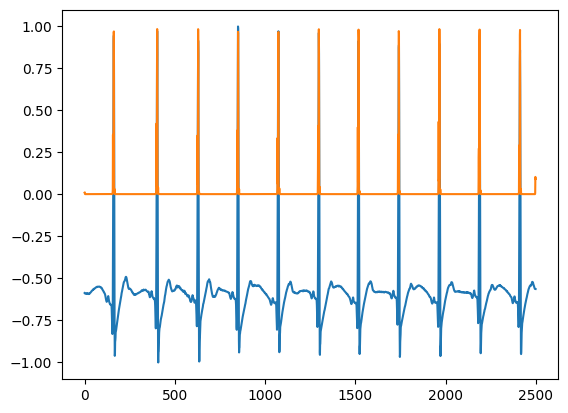

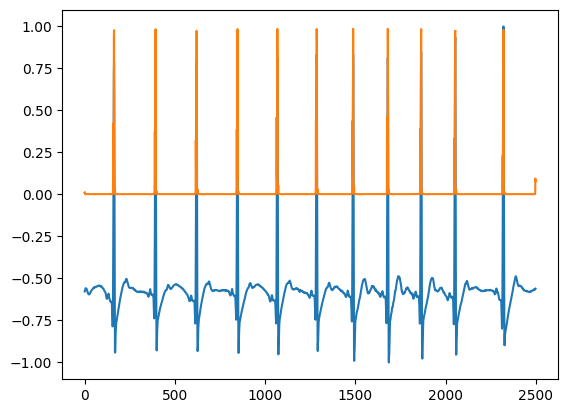

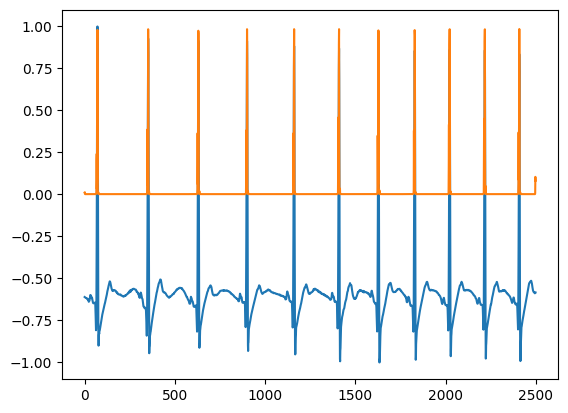

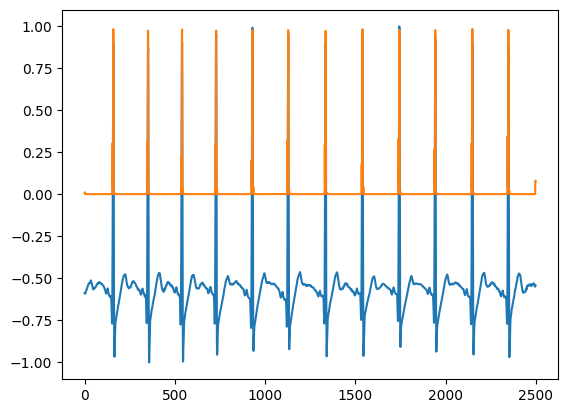

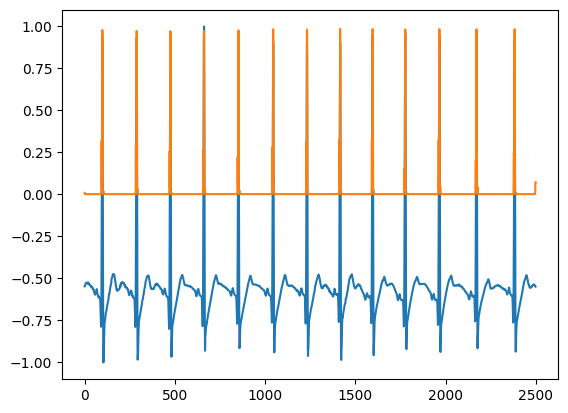

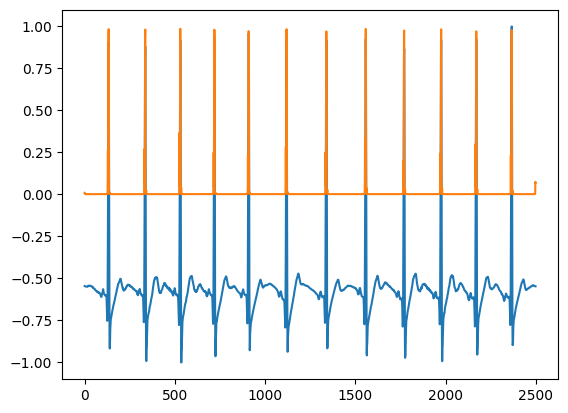

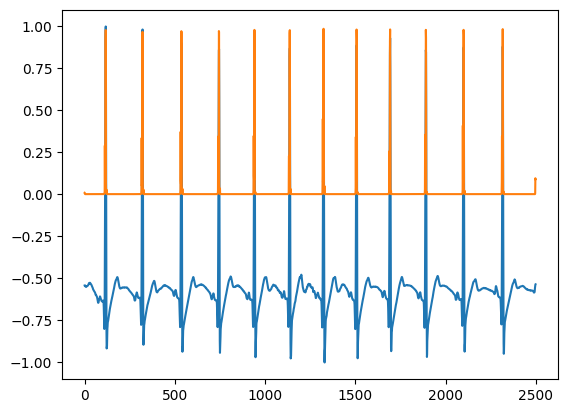

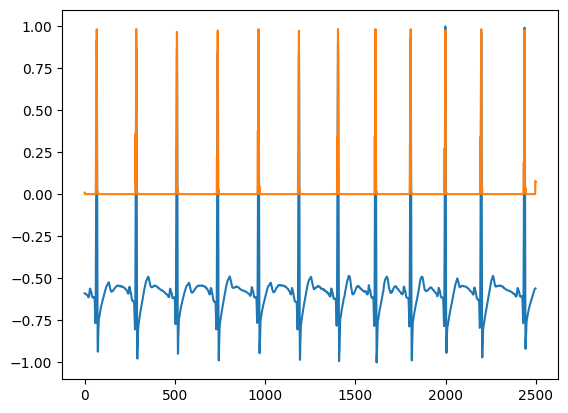

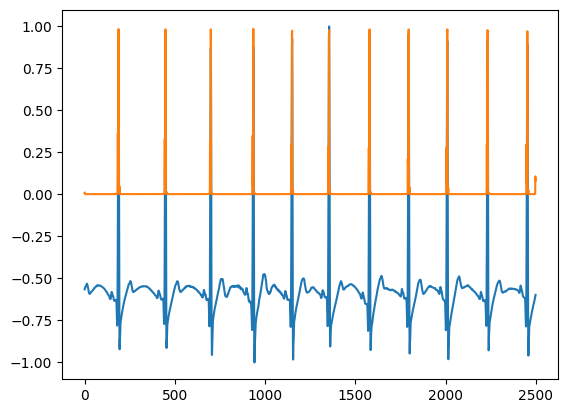

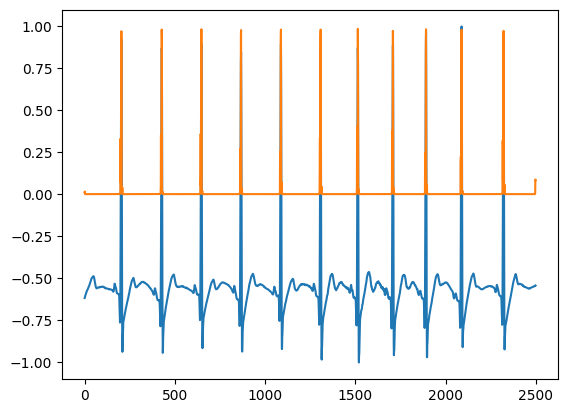

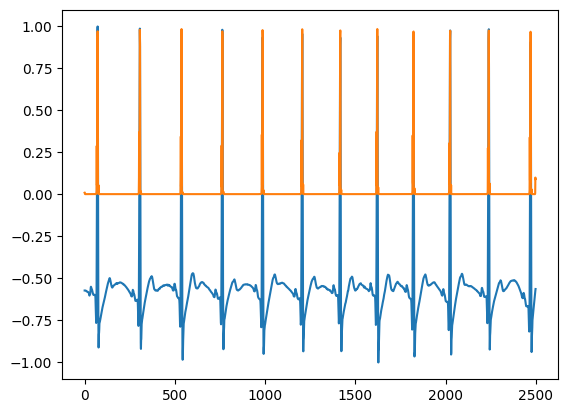

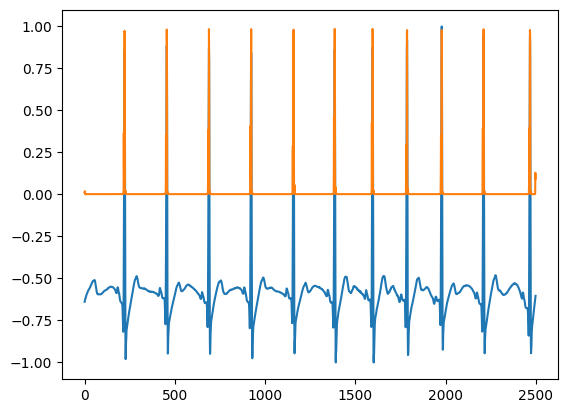

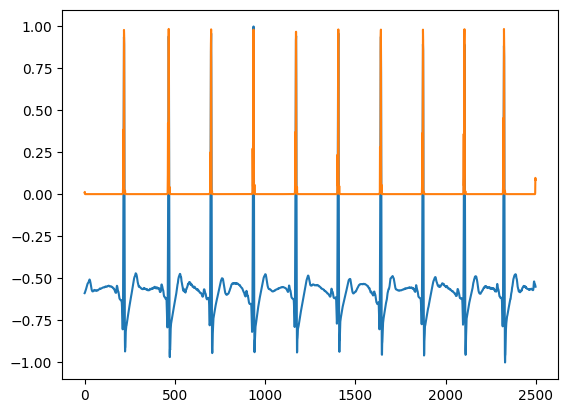

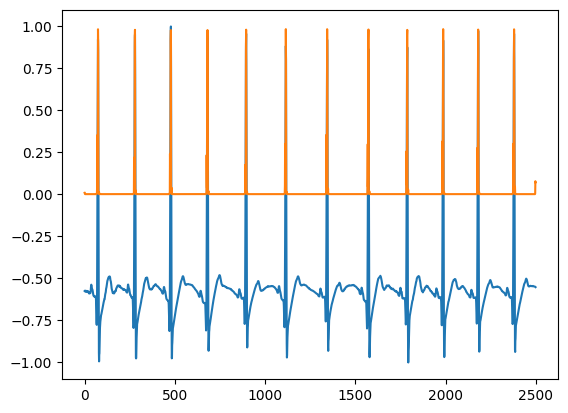

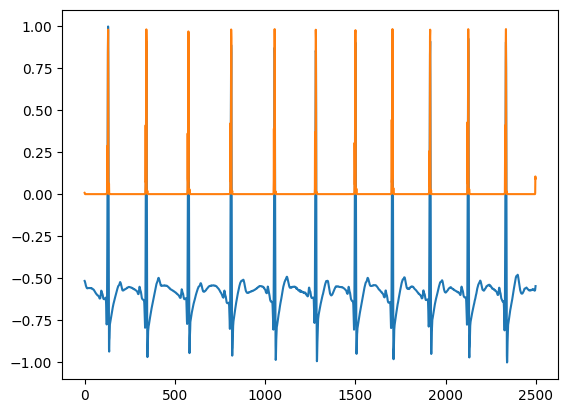

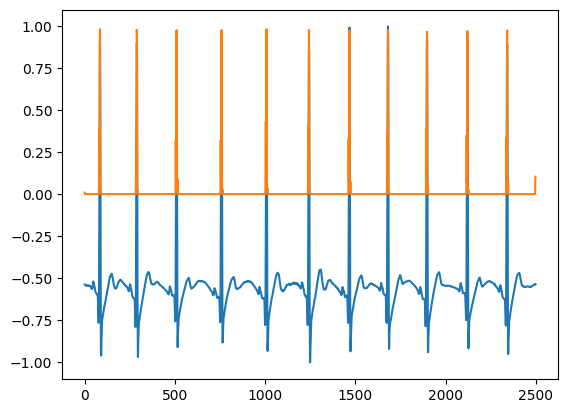

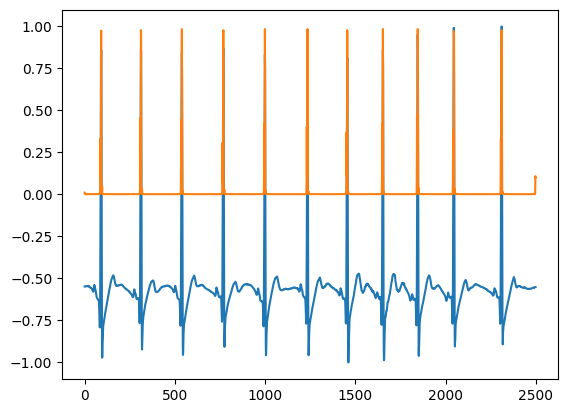

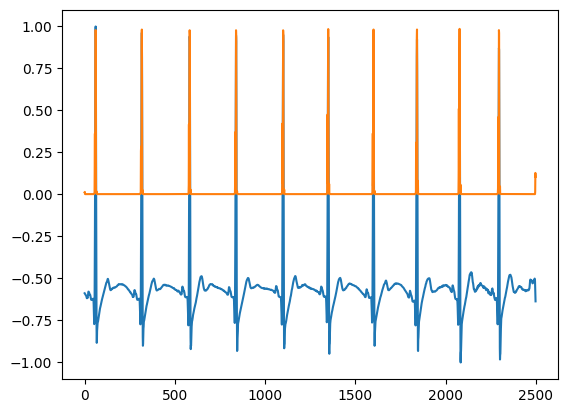

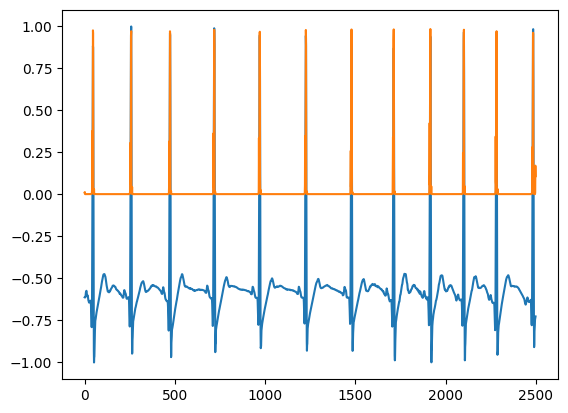

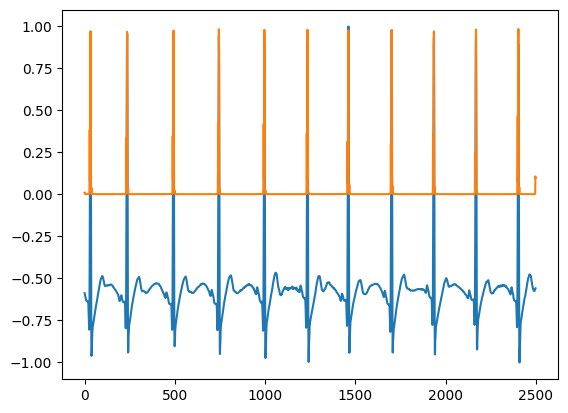

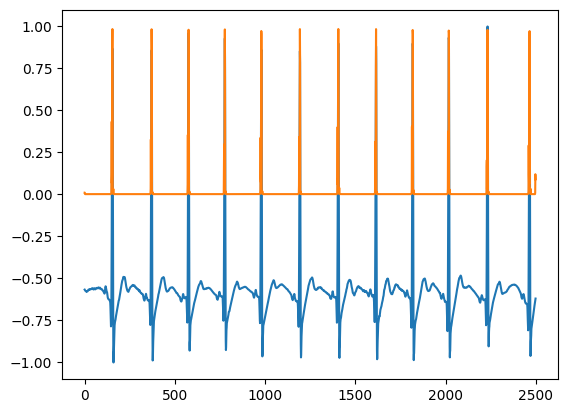

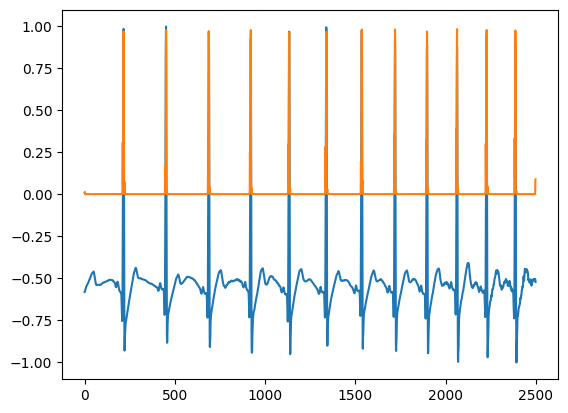

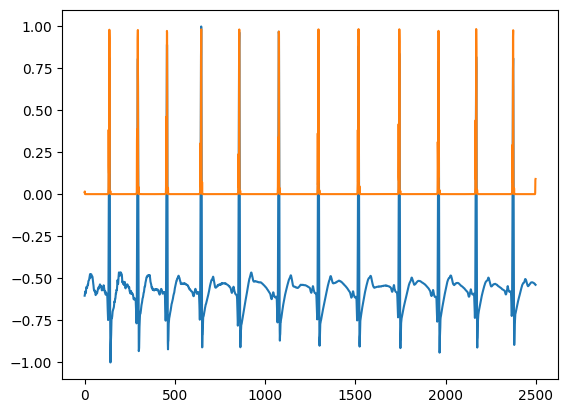

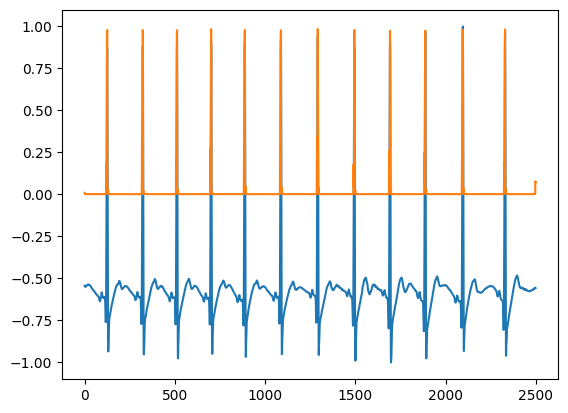

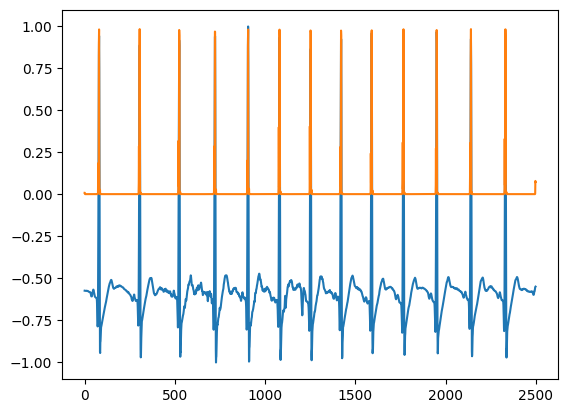

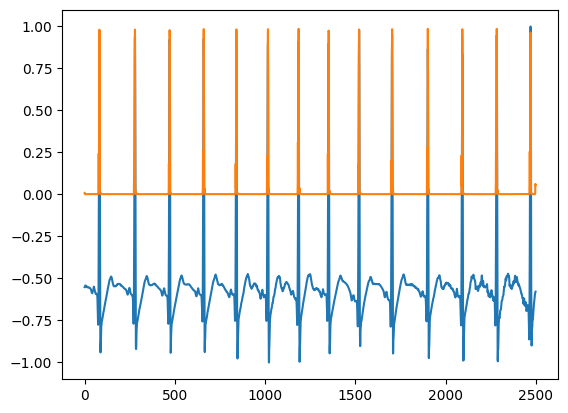

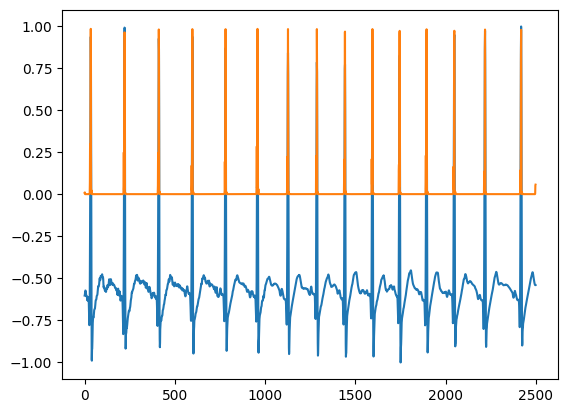

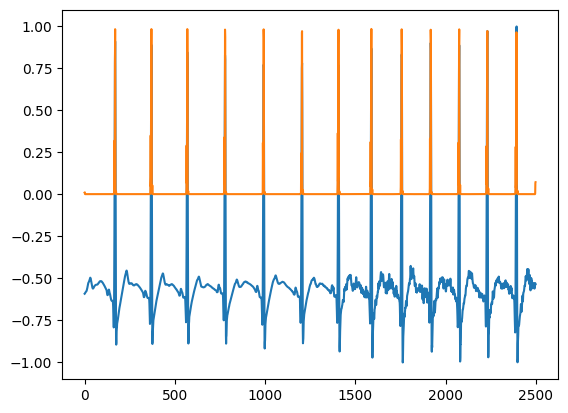

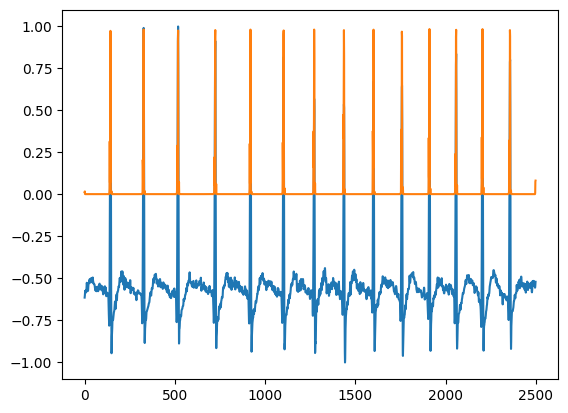

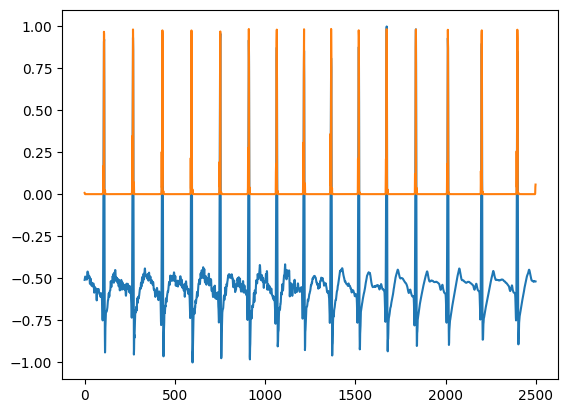

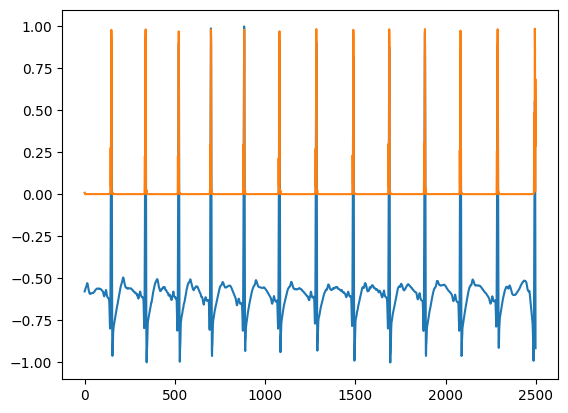

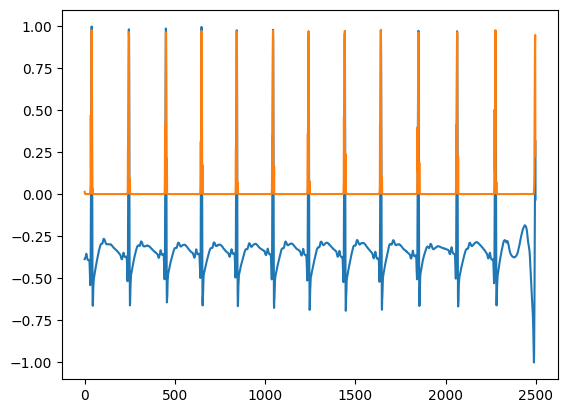

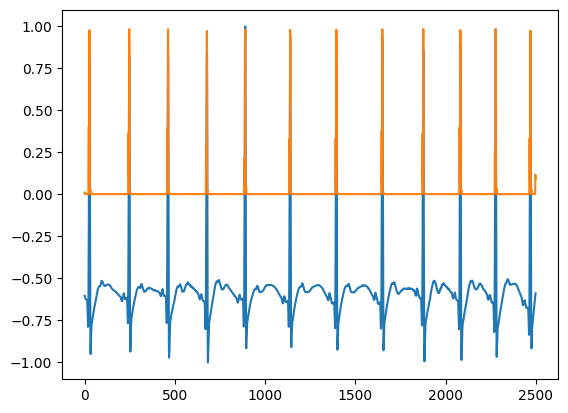

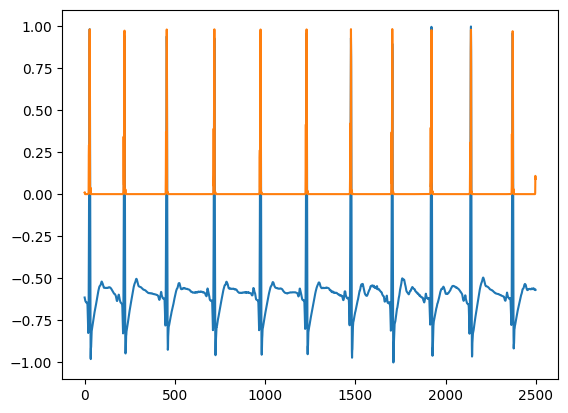

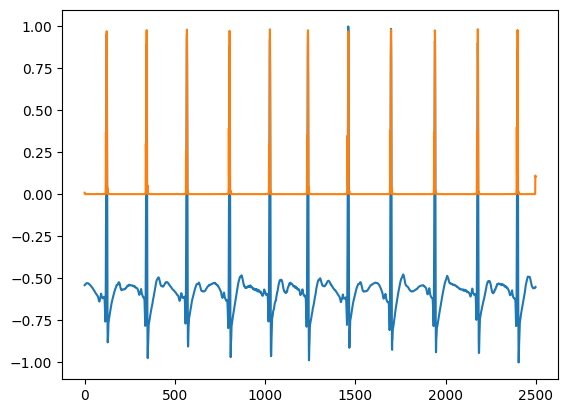

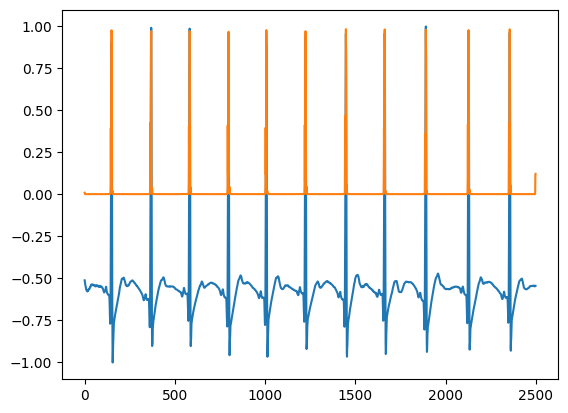

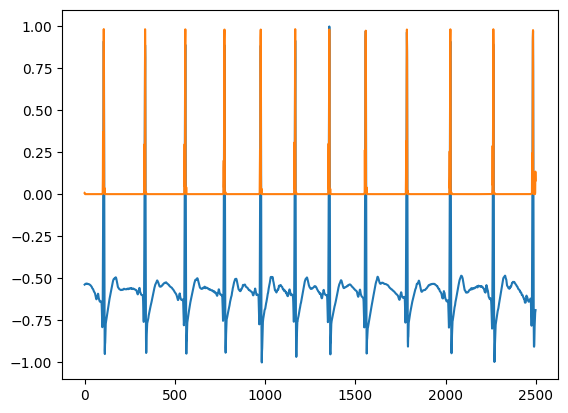

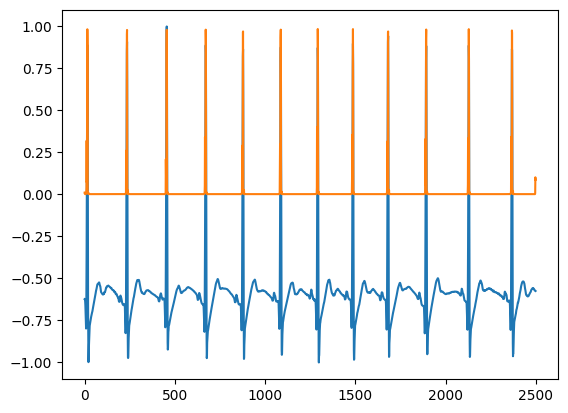

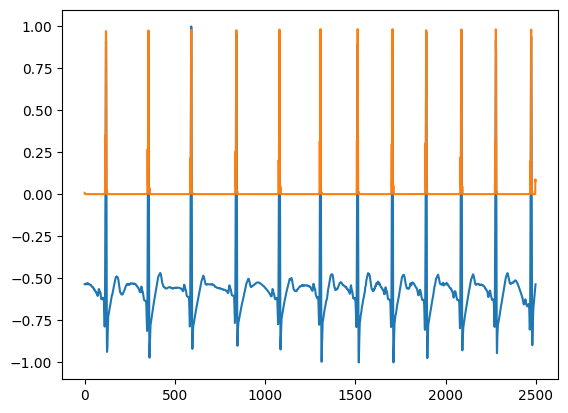

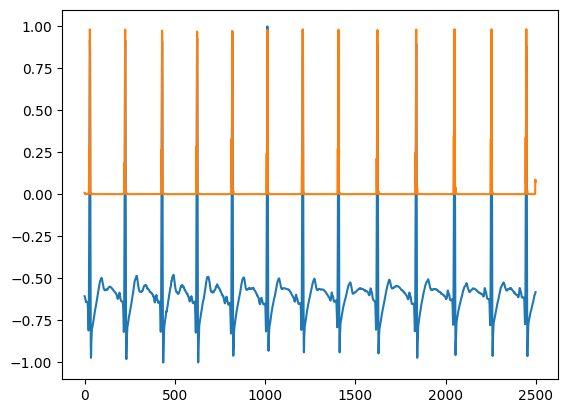

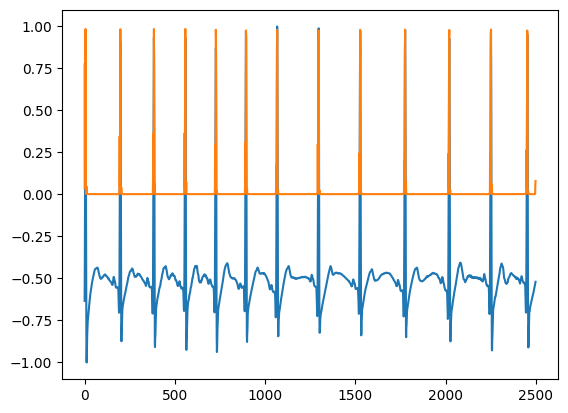

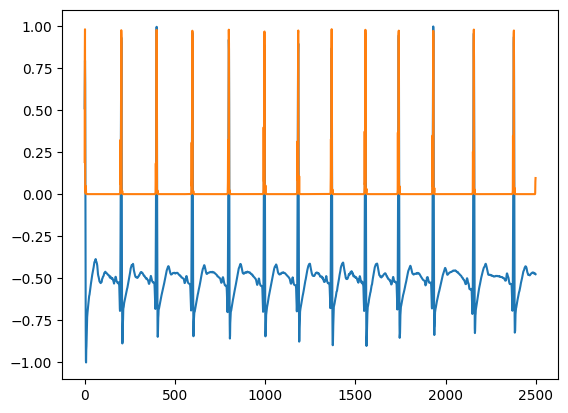

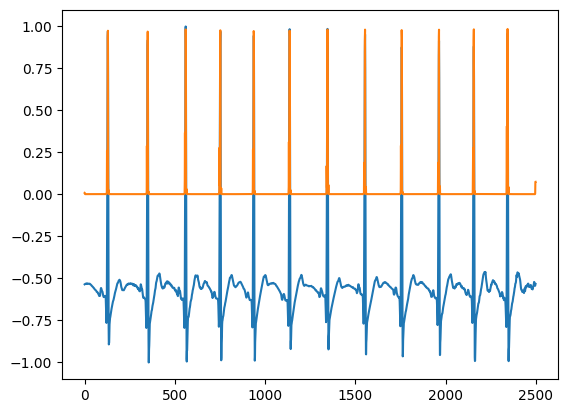

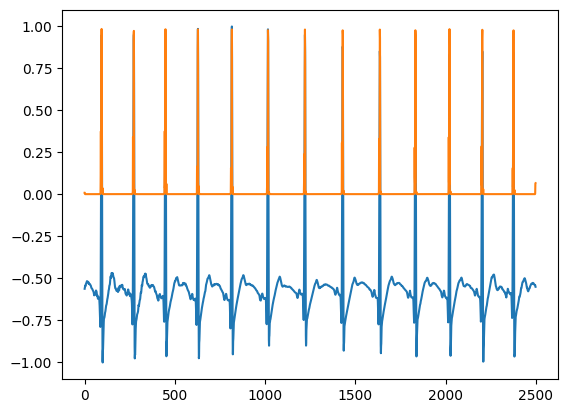

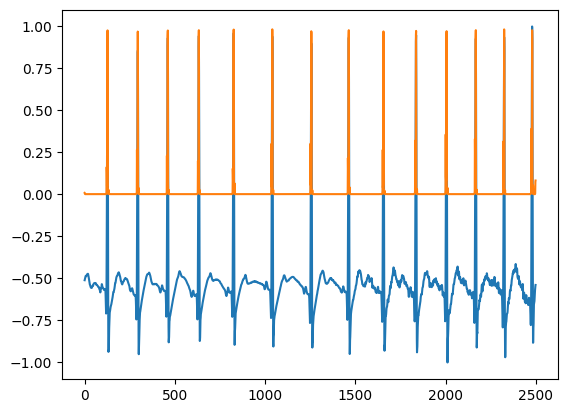

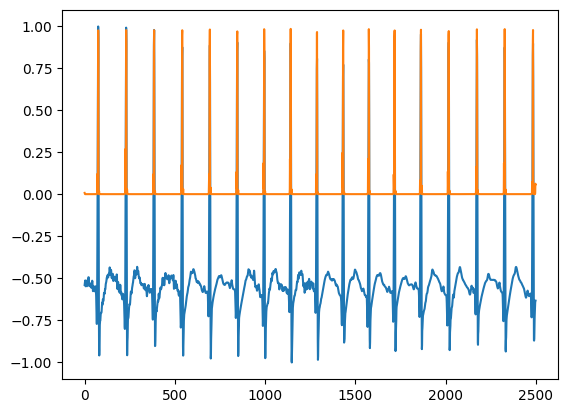

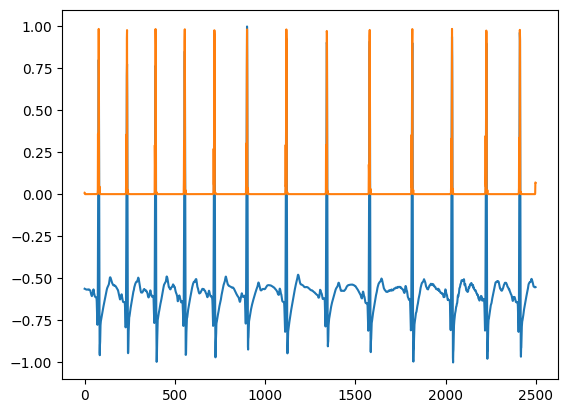

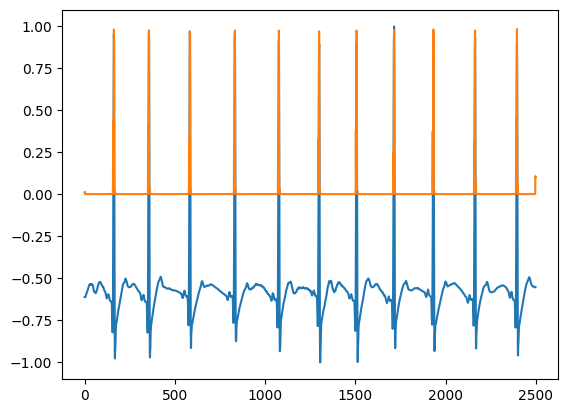

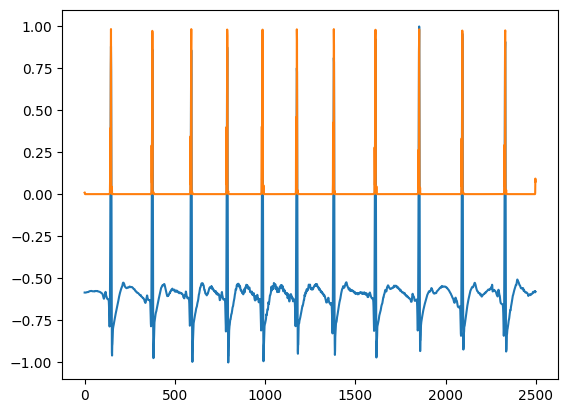

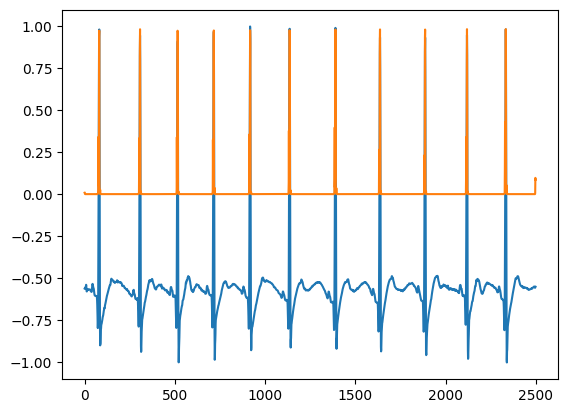

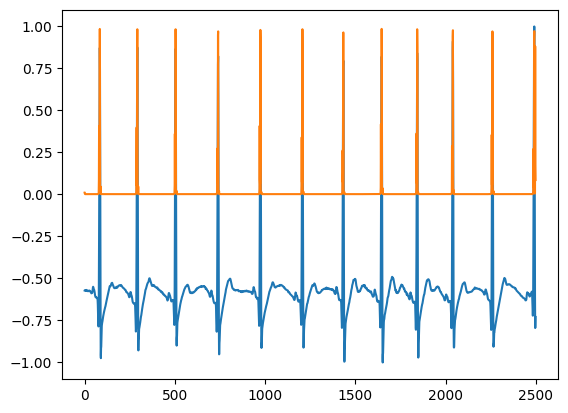

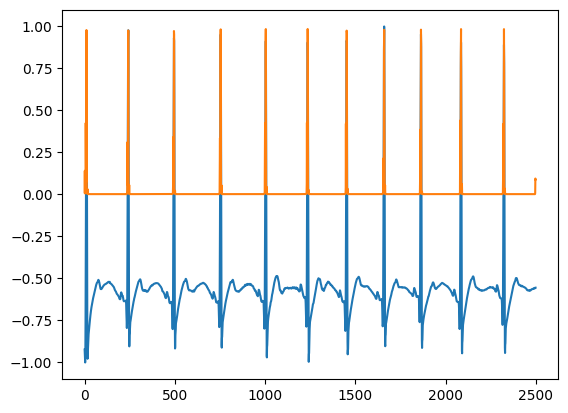

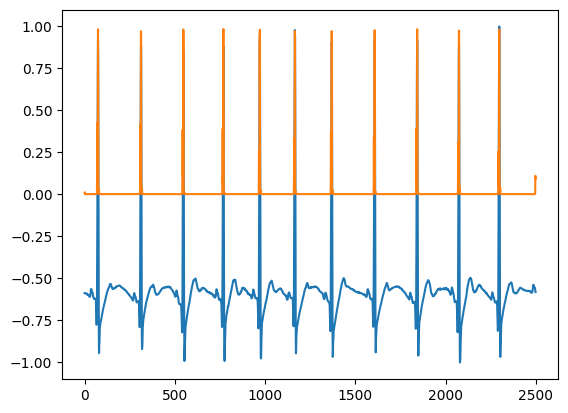

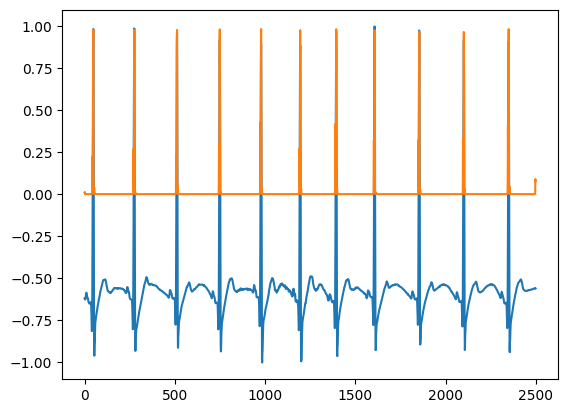

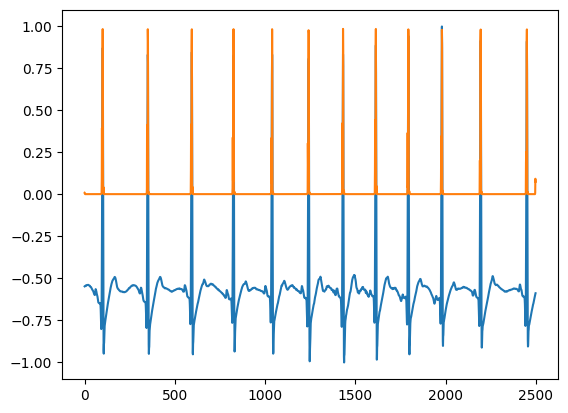

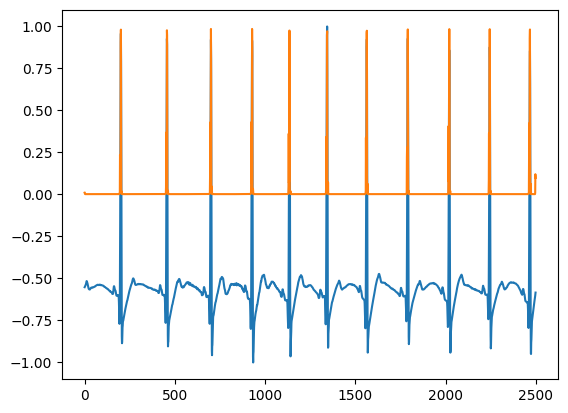

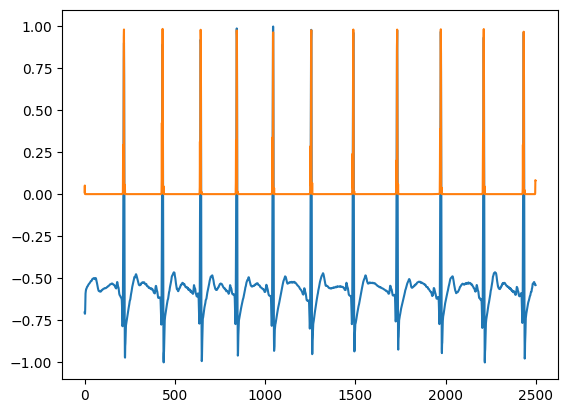

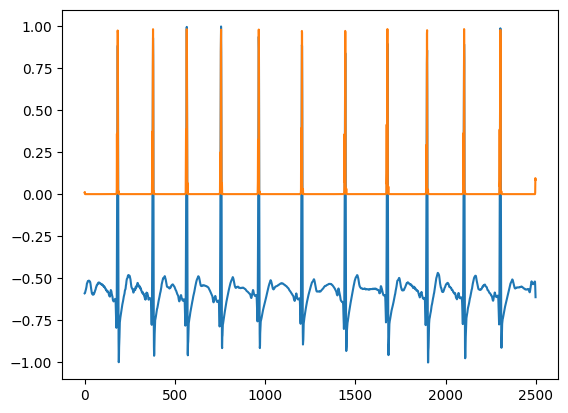

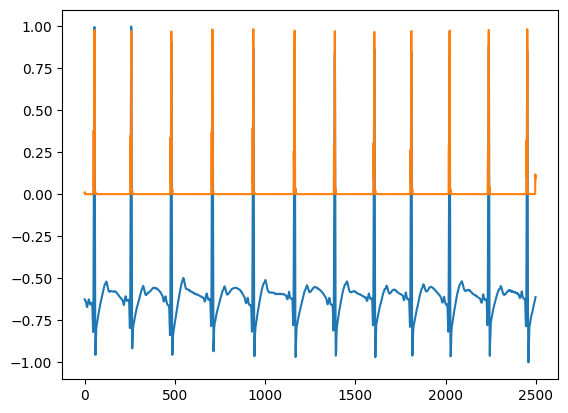

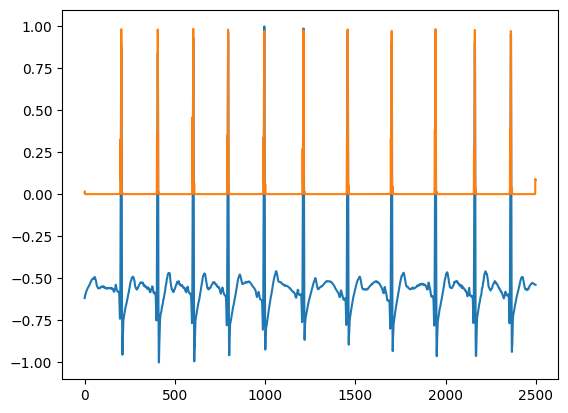

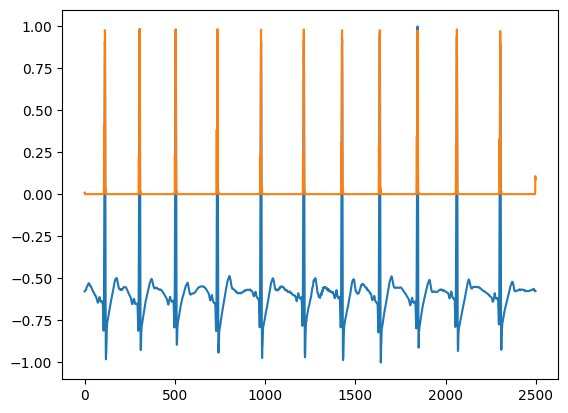

In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

for i in range(ecgs.shape[0]):
  ecg = np.reshape(ecgs[i], (1,-1,1))
  ecg_gpu = torch.Tensor(ecg).to(device)
  prediction = model(ecg_gpu)
  prediction = prediction.cpu().detach().numpy().flatten()
  
  plt.plot(ecg.flatten())
  plt.plot(prediction.flatten())
  plt.show()

### Test with Apnea-ecg dataset

In [7]:
x_train, y_train, x_test, y_test, x_val, y_val = read_dataset(apnea_ecg_path + "\\dataset", is_validation_set=True)

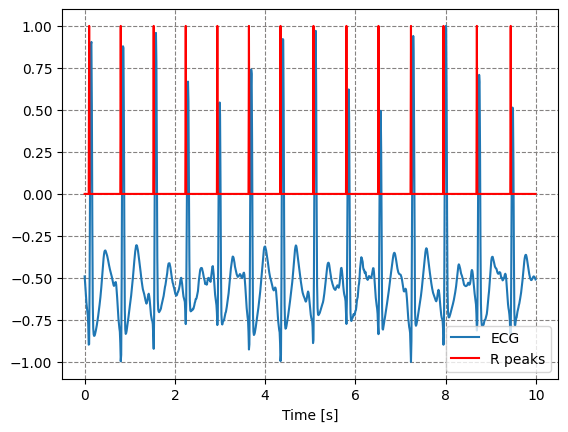

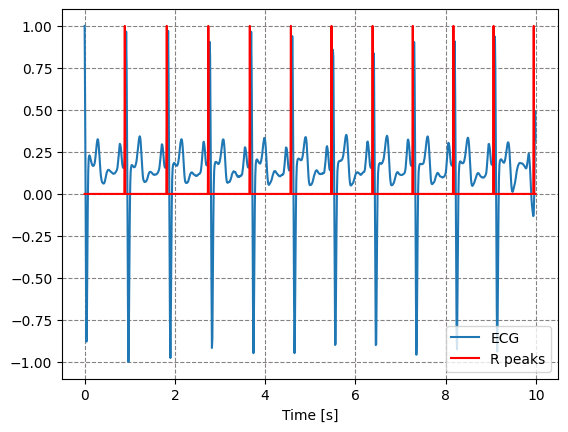

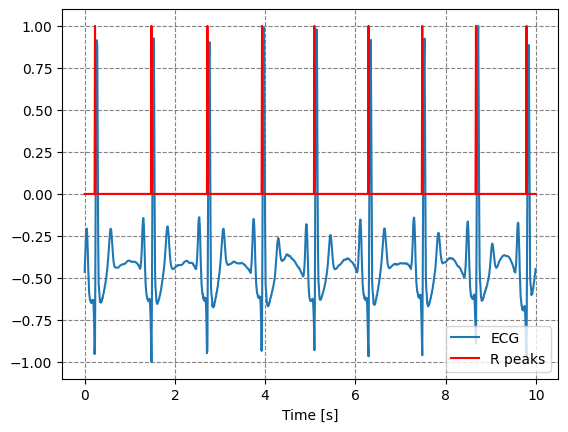

In [8]:
x_train = np.expand_dims(x_train, 2)
y_train = np.expand_dims(y_train, 2)

x_test = np.expand_dims(x_test, 2)
y_test = np.expand_dims(y_test, 2)

x_val = np.expand_dims(x_val, 2)
y_val = np.expand_dims(y_val, 2)

plot_ecg(x_train[100].flatten(), y_train[100].flatten(), 100)
plot_ecg(x_test[-1].flatten(), y_test[-1].flatten(), 100)
plot_ecg(x_val[-1].flatten(), y_val[-1].flatten(), 100)

  0%|          | 0/16264 [00:00<?, ?it/s]e:\anaconda3\envs\torch\Lib\site-packages\torch\nn\functional.py:5504: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


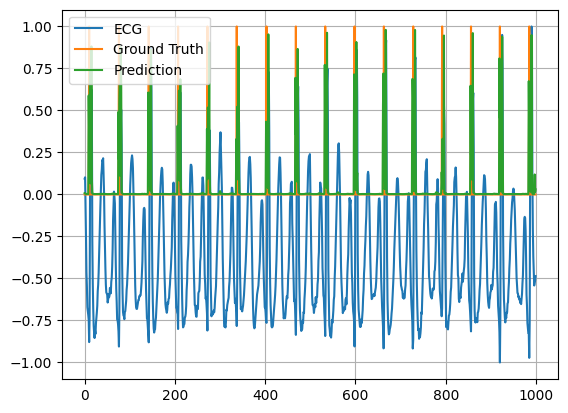

 10%|▉         | 1621/16264 [00:33<04:50, 50.36it/s]

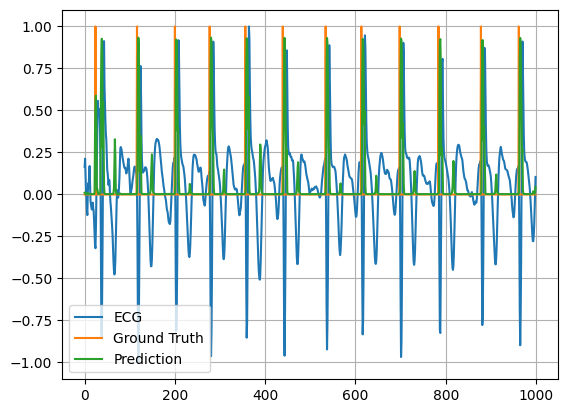

 20%|█▉        | 3248/16264 [01:06<04:18, 50.34it/s]

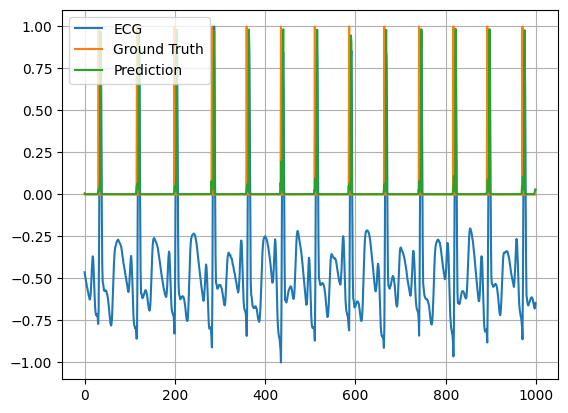

 30%|██▉       | 4873/16264 [01:39<03:48, 49.88it/s]

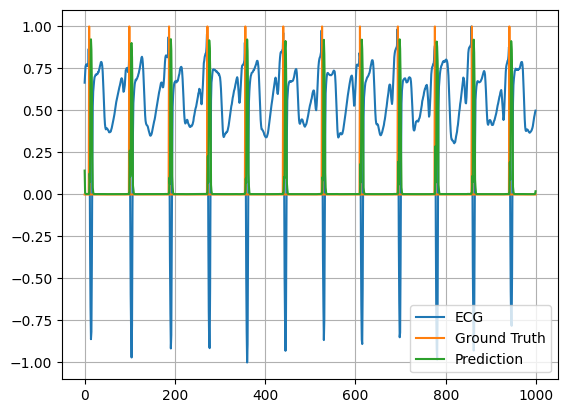

 40%|███▉      | 6504/16264 [02:12<03:15, 49.96it/s]

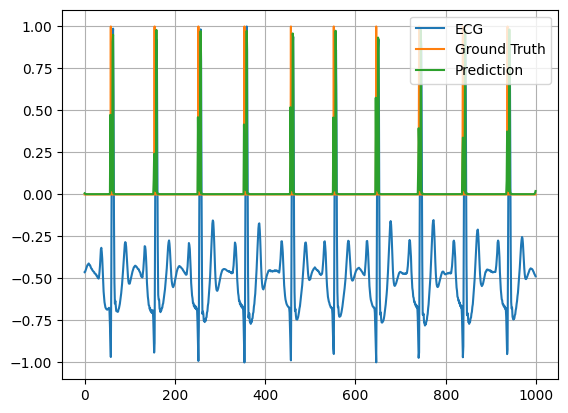

 50%|████▉     | 8128/16264 [02:45<02:42, 50.14it/s]

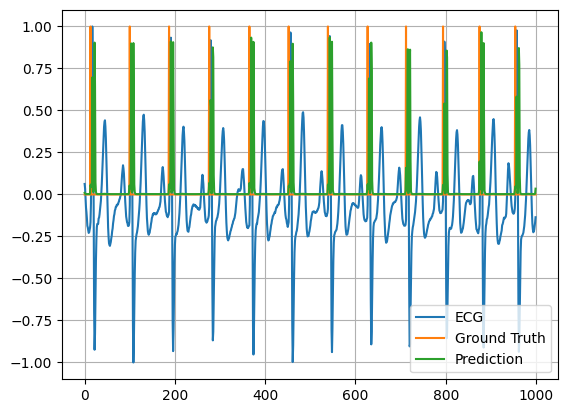

 60%|█████▉    | 9752/16264 [03:19<02:15, 47.98it/s]

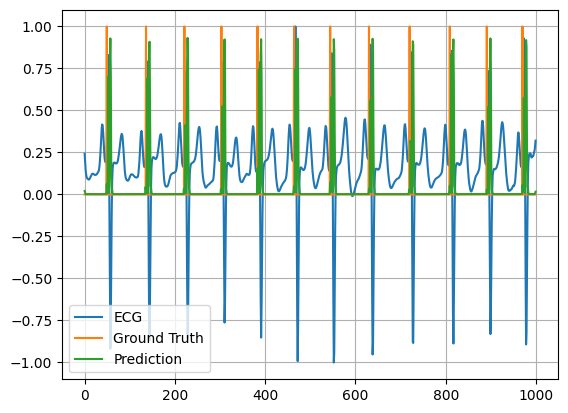

 70%|██████▉   | 11377/16264 [03:53<01:38, 49.82it/s]

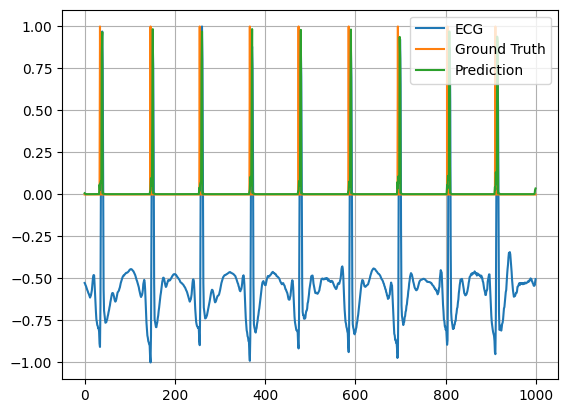

 80%|███████▉  | 13003/16264 [04:28<01:04, 50.18it/s]

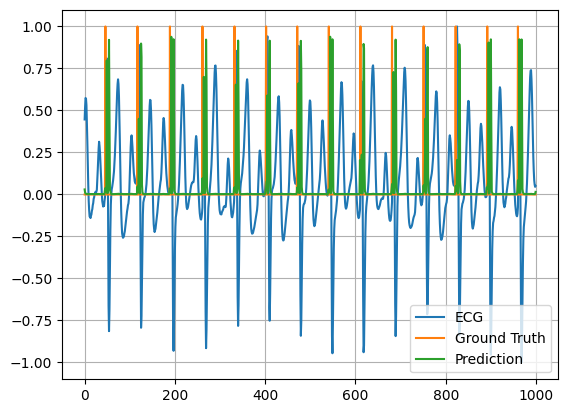

 90%|████████▉ | 14630/16264 [05:01<00:32, 49.95it/s]

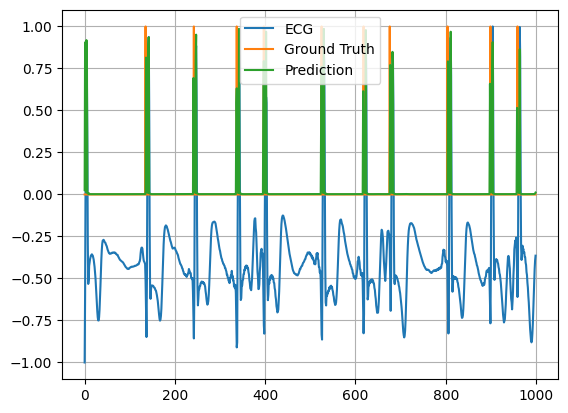

100%|█████████▉| 16260/16264 [05:42<00:00, 50.35it/s]

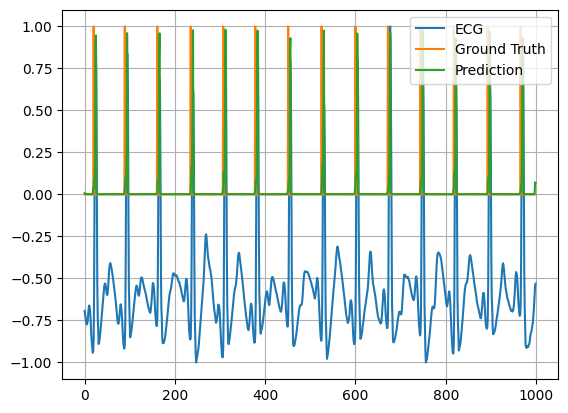

100%|██████████| 16264/16264 [05:43<00:00, 47.39it/s]



Test Loss: 0.3573
Test Weighted Accuracy: 0.98420
Test F1 Score: 0.75749
Test TPR: 0.97508
Test FPR: 0.00668
Test TNR: 0.99332
Test FNR: 0.02492



In [9]:
model.test_model(x_test=x_train,y_test=y_train, plot=True)